# Anotações referentes a projetos reais

### Import Libs

Realizar a importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip3 install sweetviz
import sweetviz as sv #Estudar sobre, mas pelo que vi ela traz estatisticas gerais do DF

### Criação do DF

Realizar a criação do DataFrame

In [3]:
df = pd.read_csv('Pandas/Panda básico/dados/aluguel.csv', sep=';')

In [4]:
df['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

Como vimos acima, o df está trazendos todos os tipo de imoveis, porém queremos só os tipos residenciais

In [5]:
residencial = ['Quitinete','Casa','Apartamento','Casa de Condomínio','Casa de Vila']

In [6]:
df = df[df['Tipo'].isin(residencial)]

### Visualização Geral

- Visualizar o DF como um todo para encontrar possiveis pontos de atenção como dados faltandos, dados duplicados entre outros

#### Visualizar informações gerais do df com sweetviz (SV)

                                             |                                             | [  0%]   00:00 ->…


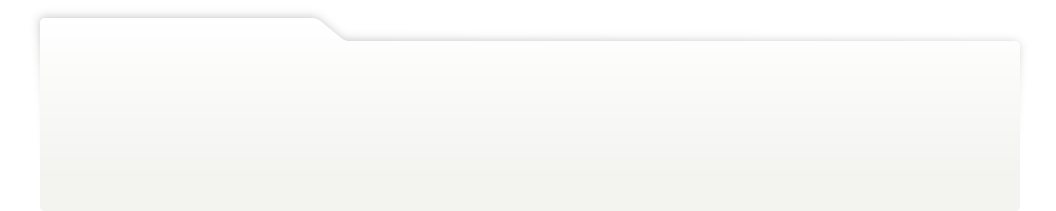
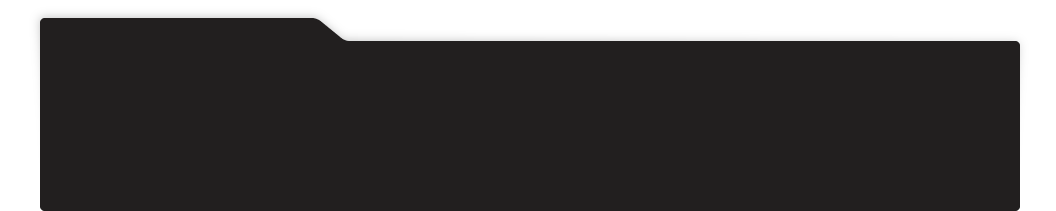
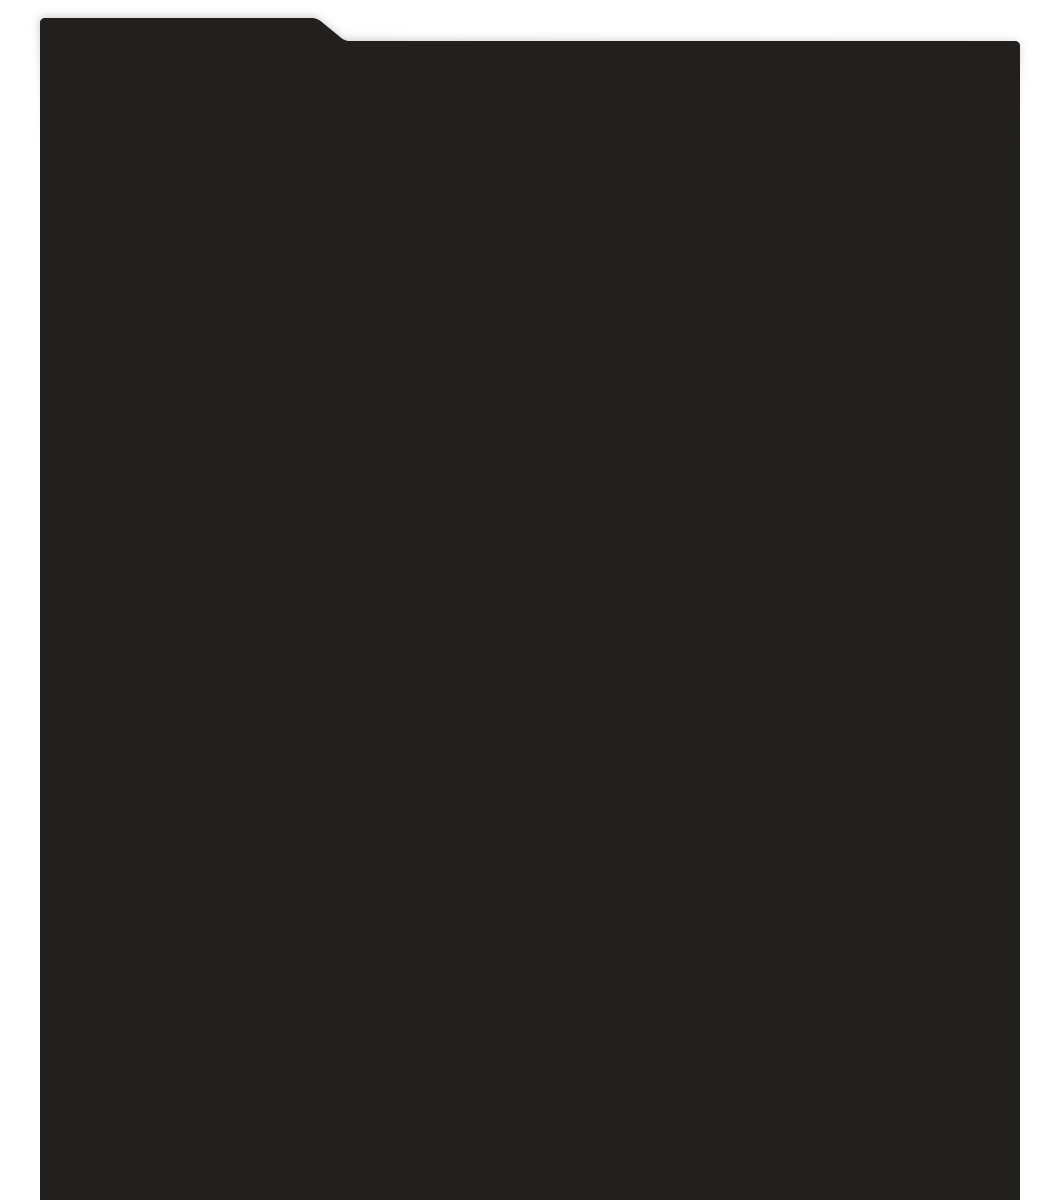
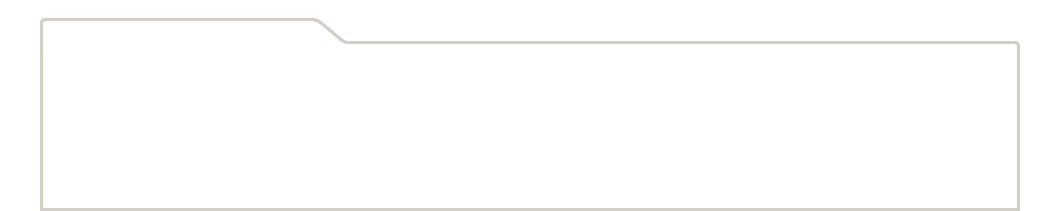
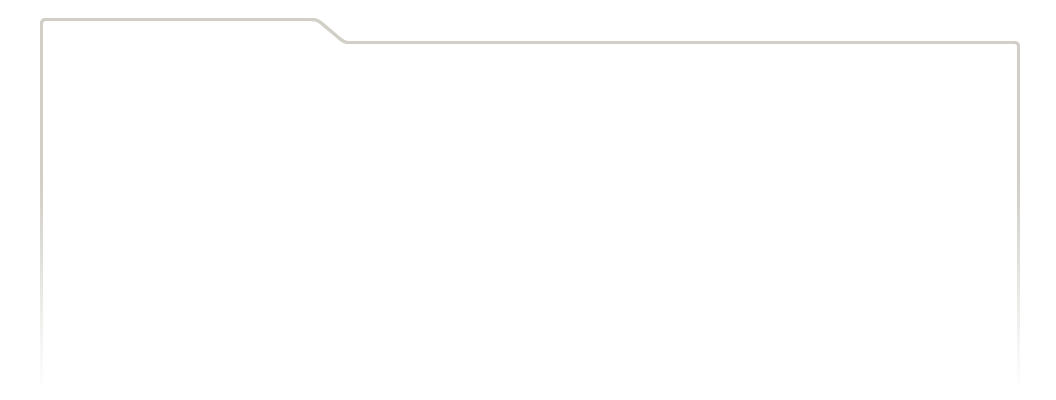
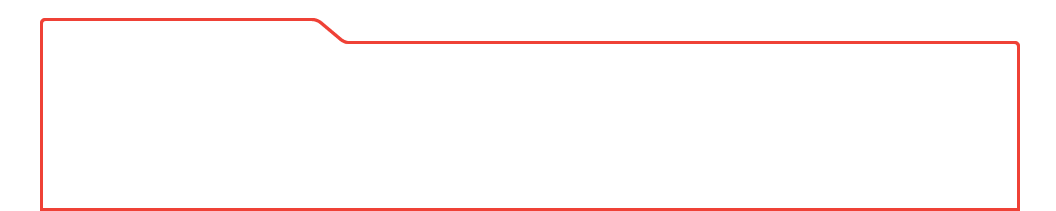
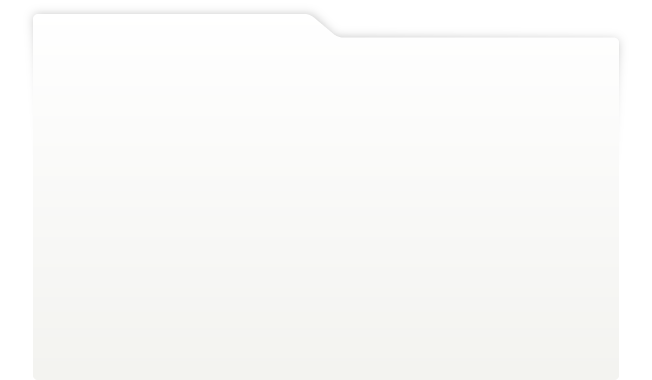
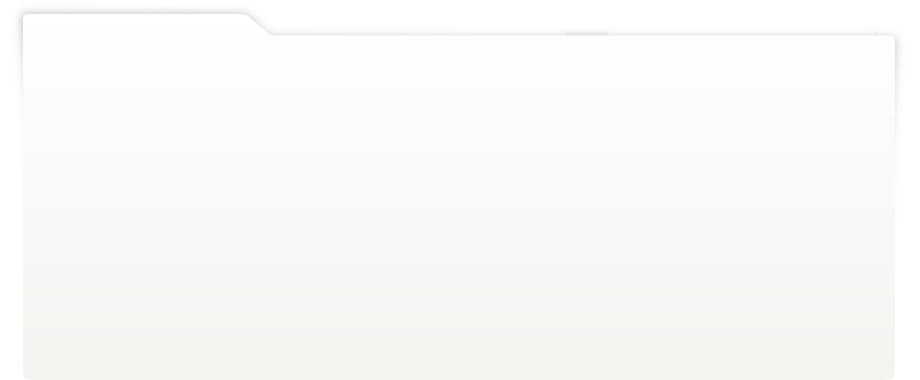
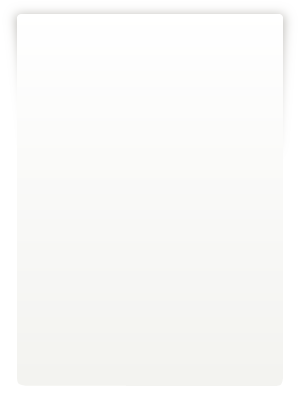
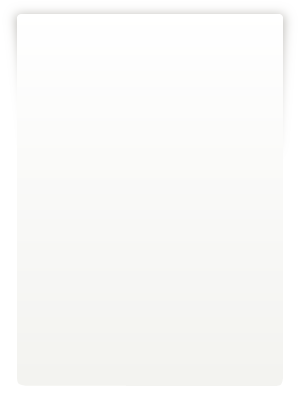
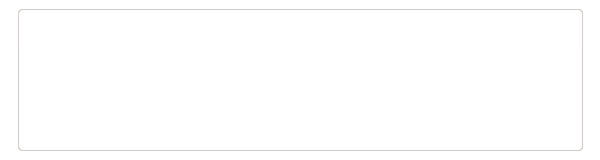
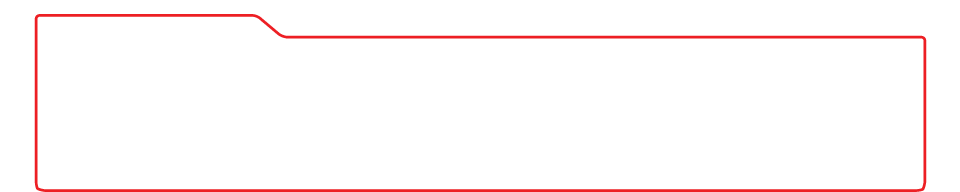
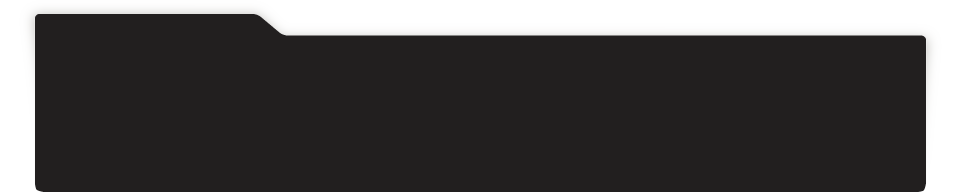
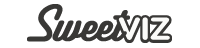
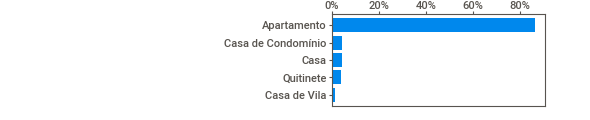
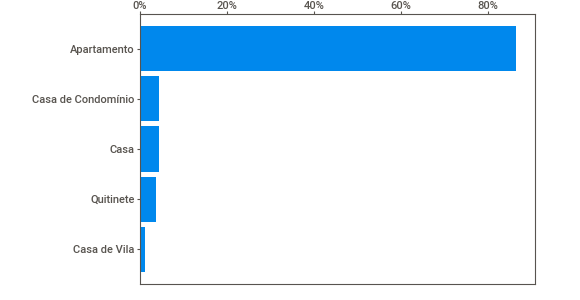
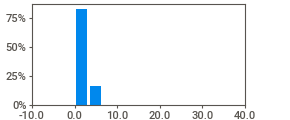
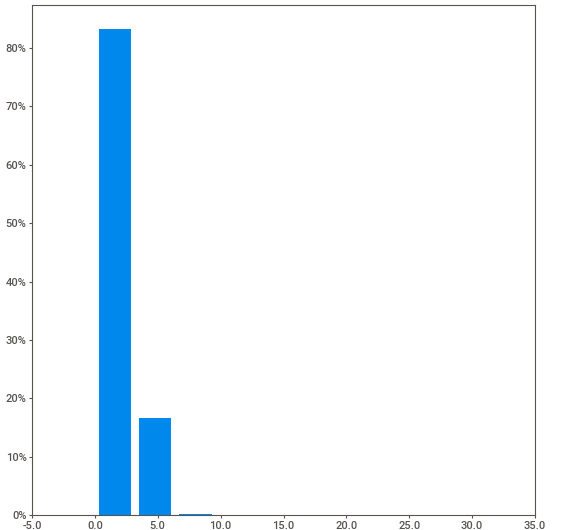
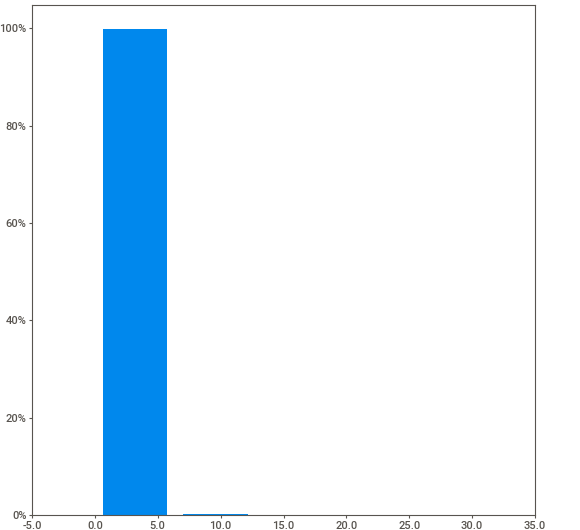
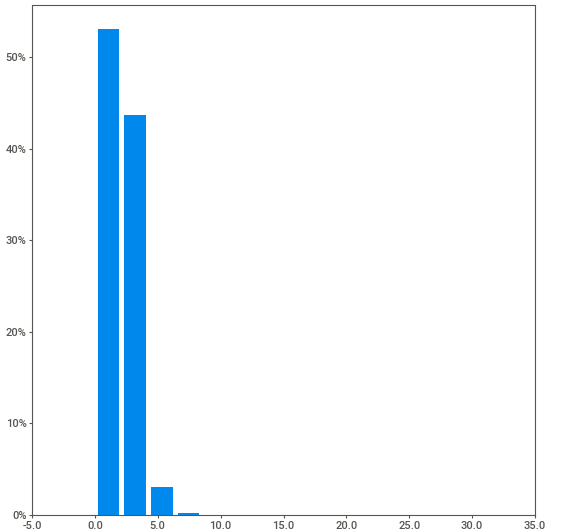
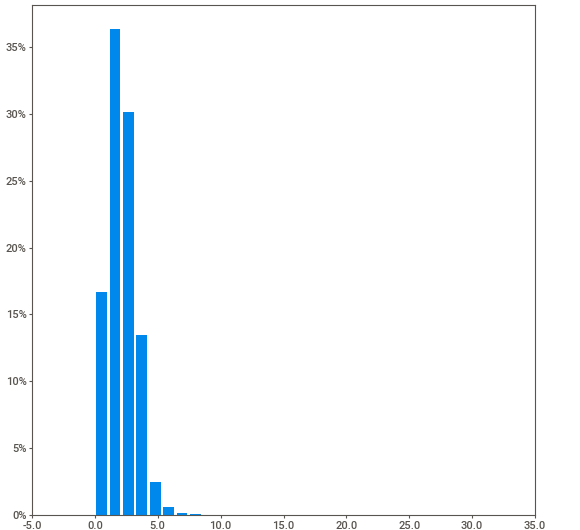
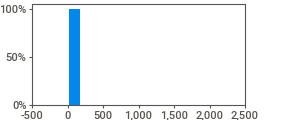
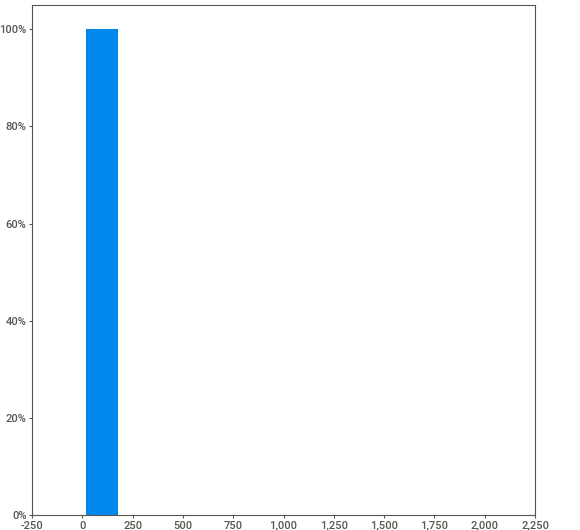
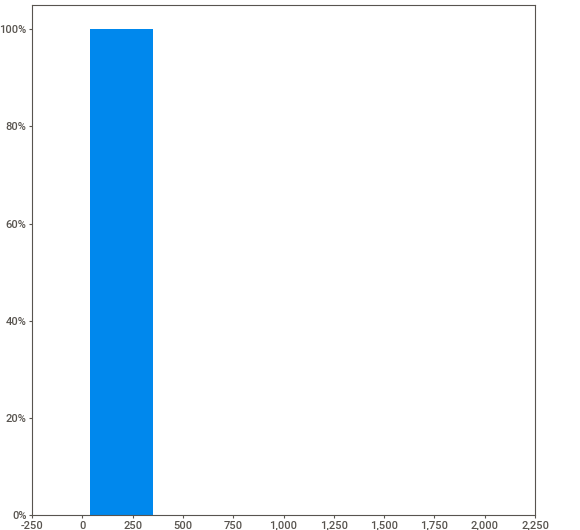
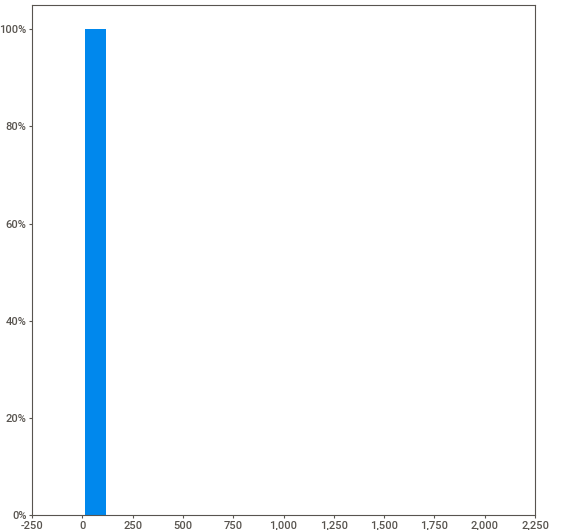
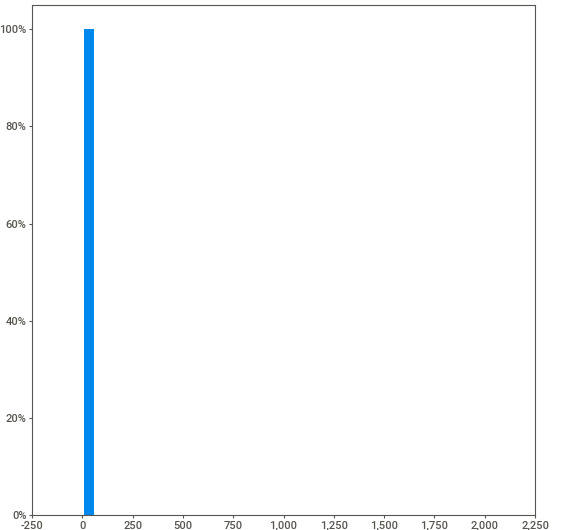
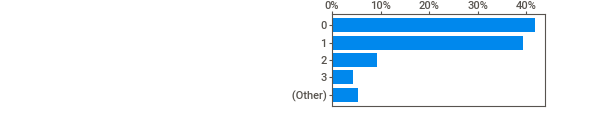
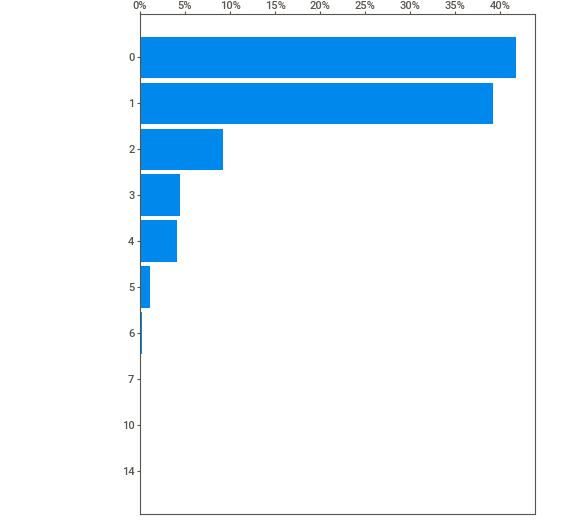
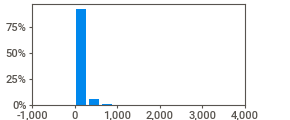
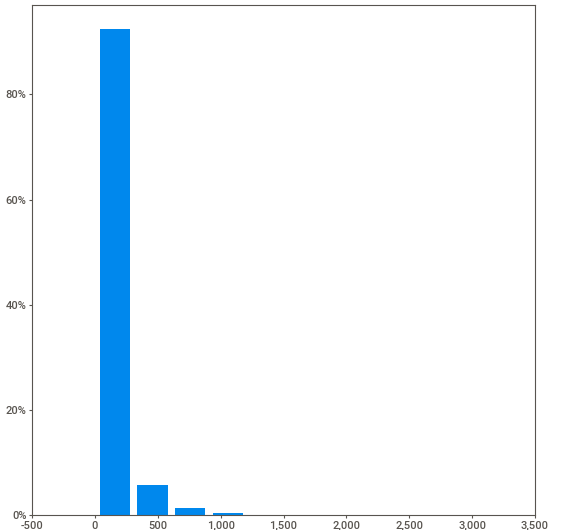
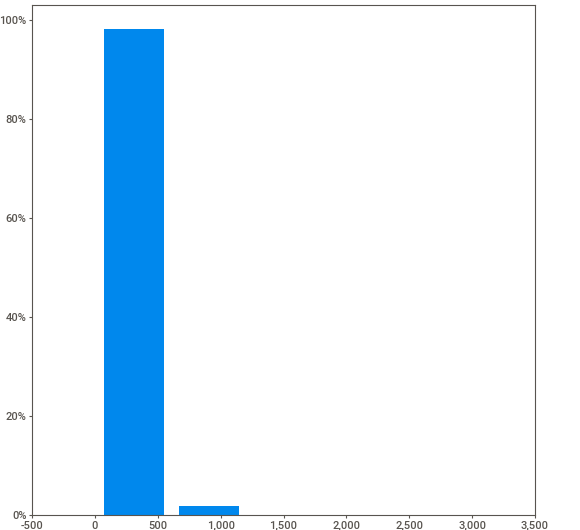
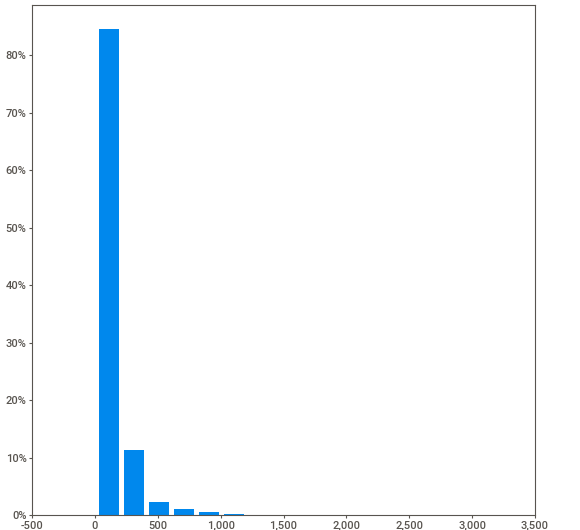
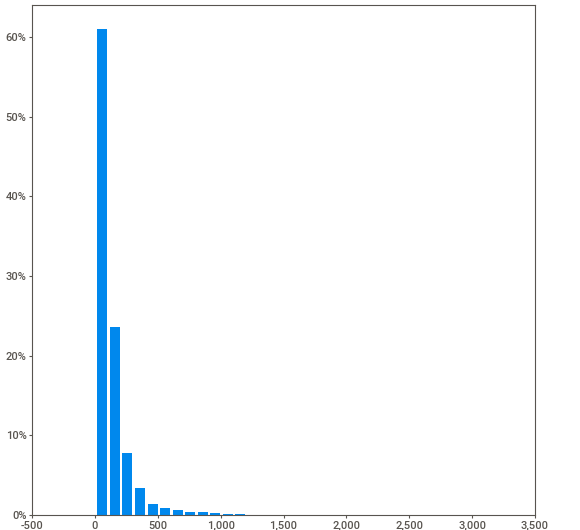
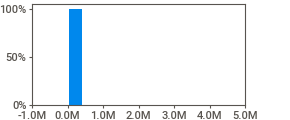
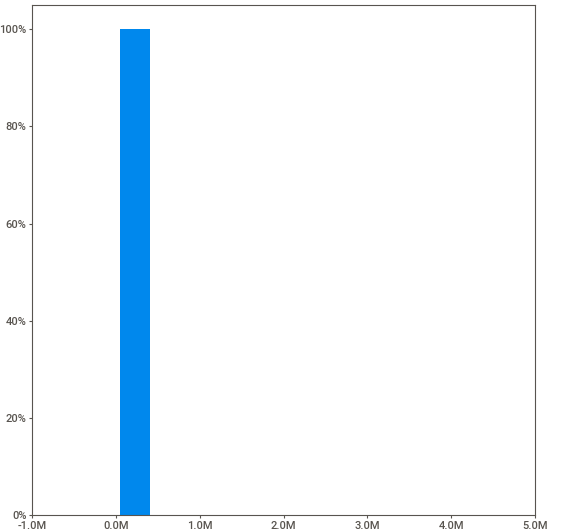
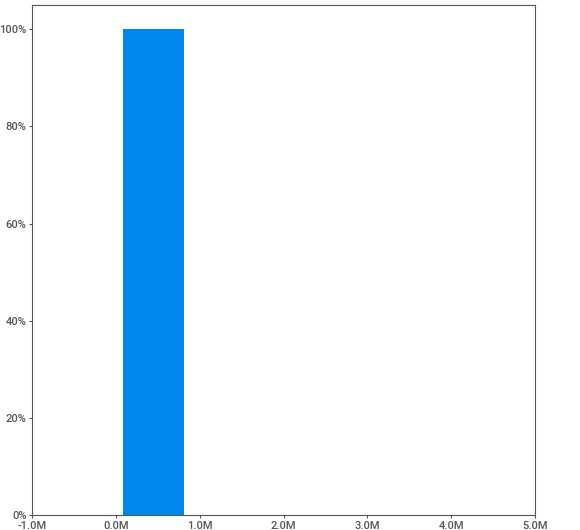
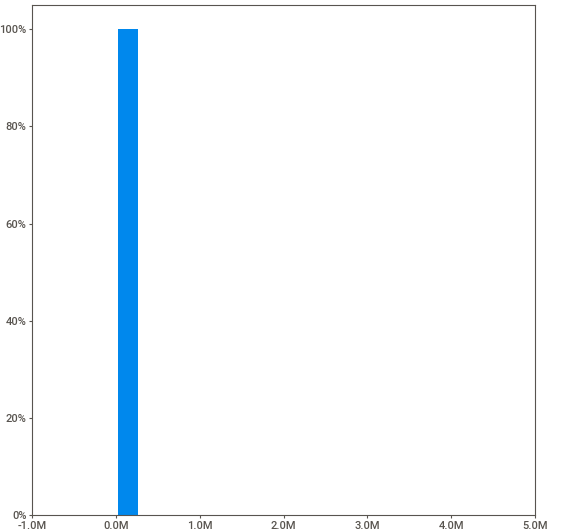
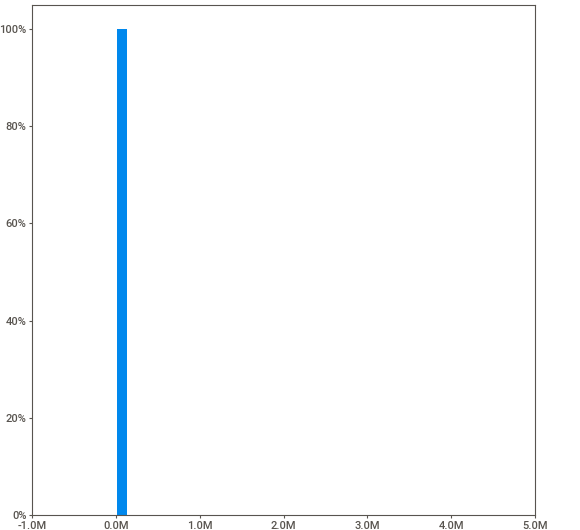
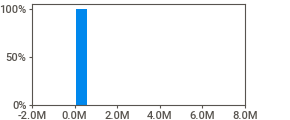
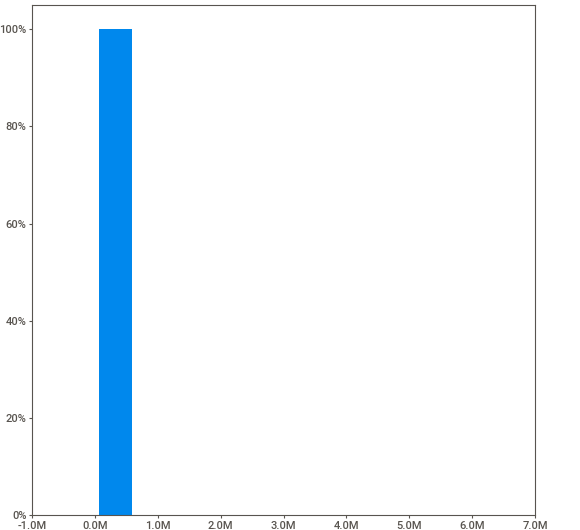
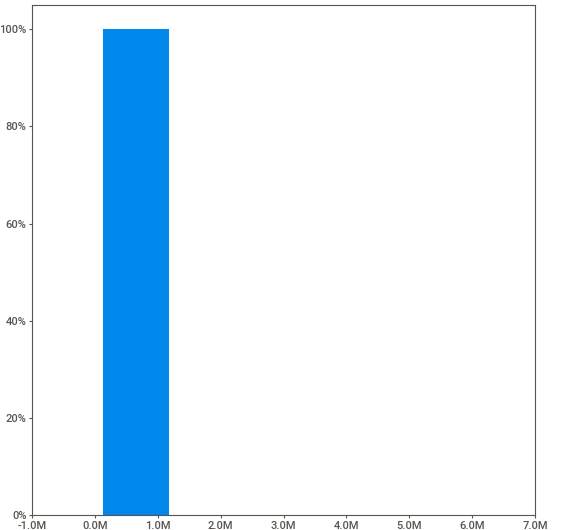
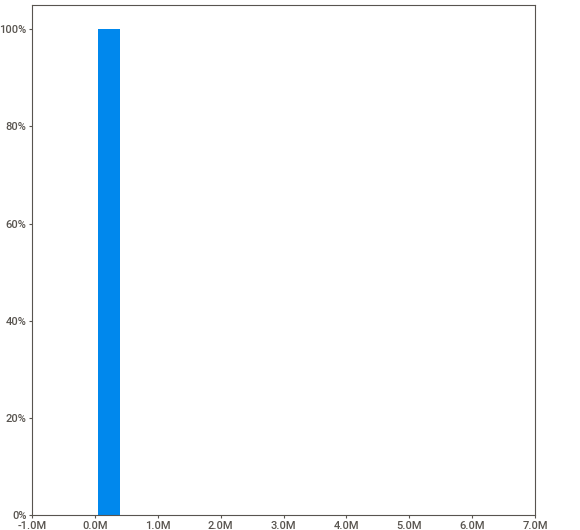
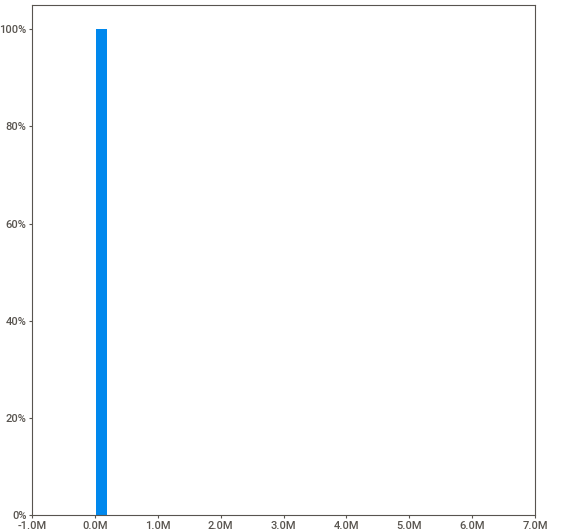
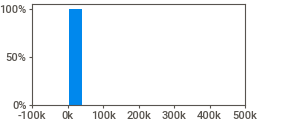
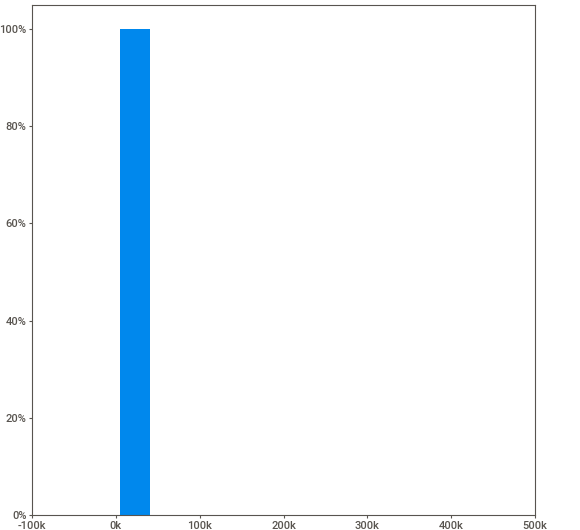
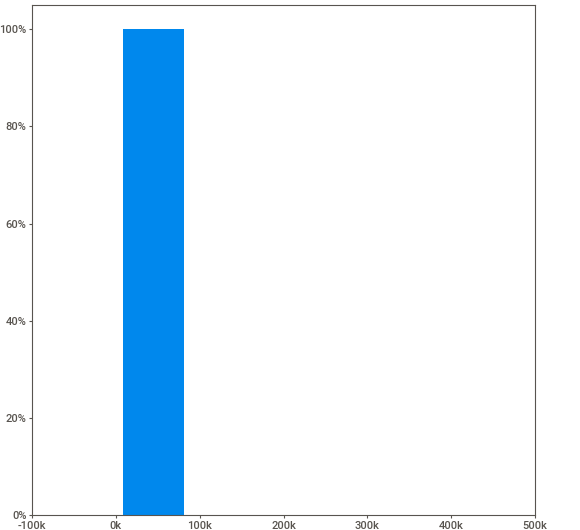
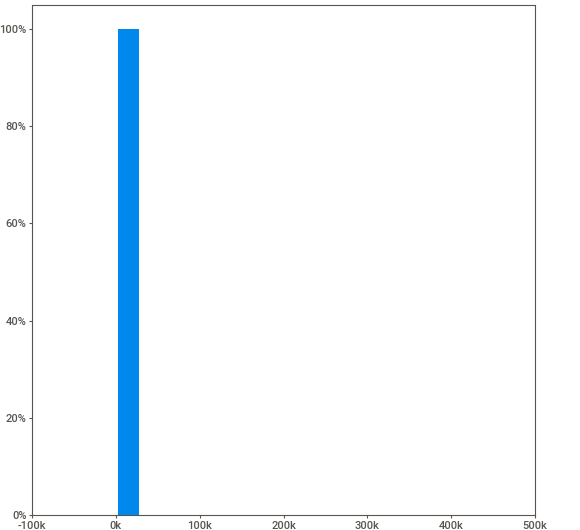
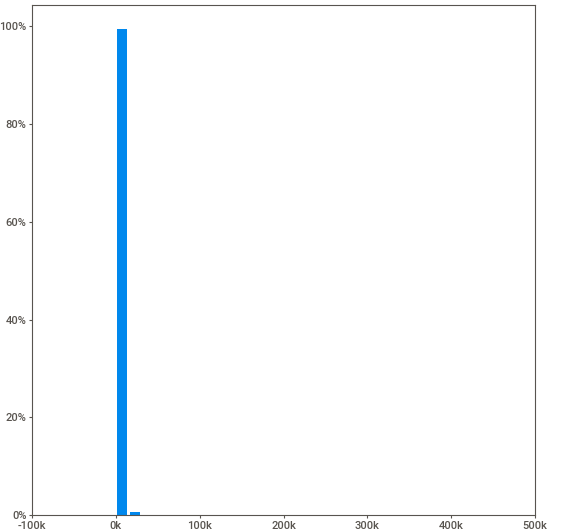
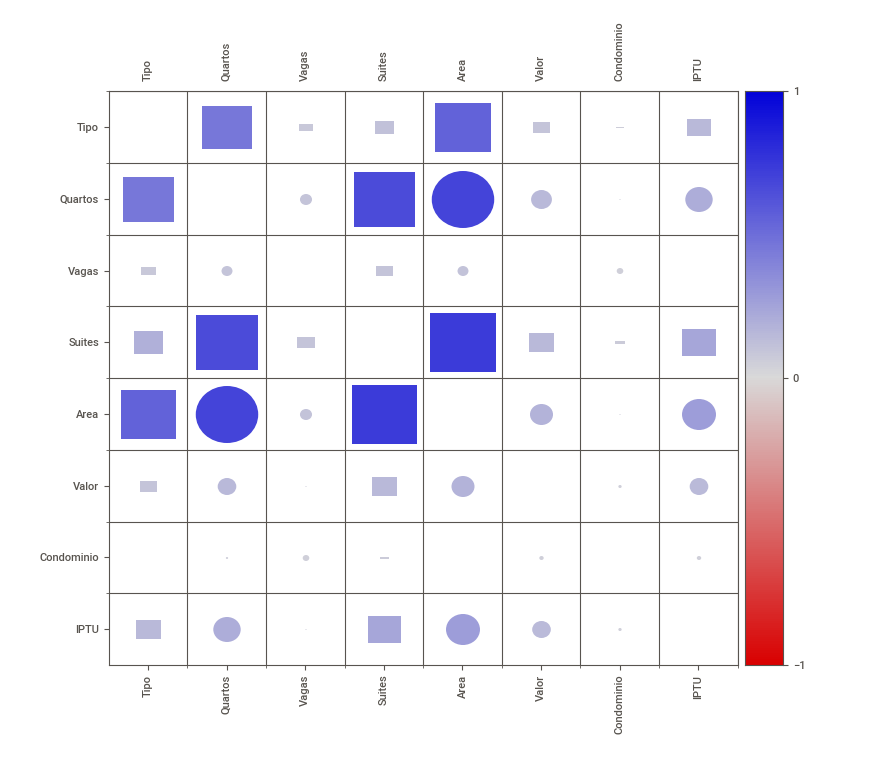
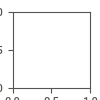

In [7]:
report = sv.analyze(df)
report.show_notebook()

- A partir deste resultado podemos extrair diversos insights, como por exemplo, os dados faltantes, dados duplicados, max, mix entre outras informações

#### **``df.describe(include='O')``**

- Traz as informações referentes as colunas do tipo texto.

In [8]:
df.describe(include='O') #Informações das colunas de texto

,Tipo,Bairro
count,22580,22580
unique,5,154
top,Apartamento,Barra da Tijuca
freq,19532,3922


In [9]:
df.describe() #Informações estatísticas dos numeros

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,22580.000000,22580.000000,22580.000000,22580.000000,2.257100e+04,2.076500e+04,15795.000000
mean,2.509699,1.284677,0.941895,136.410053,4.985730e+03,1.642732e+03,798.890282
std,1.103543,13.093263,1.139380,145.370426,3.245147e+04,4.563660e+04,4485.679038
min,0.000000,0.000000,0.000000,10.000000,1.000000e+02,1.000000e+00,1.000000
25%,2.000000,0.000000,0.000000,64.000000,1.500000e+03,5.720000e+02,96.000000
50%,2.000000,1.000000,1.000000,90.000000,2.700000e+03,9.400000e+02,220.000000
75%,3.000000,2.000000,1.000000,150.000000,5.300000e+03,1.600000e+03,525.000000
max,32.000000,1960.000000,14.000000,3000.000000,4.500000e+06,6.552570e+06,450625.000000


#### ``df.info()``

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22580 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


> Podemos ver que as colunas de ``Valor,Condominio e IPTU``, possuem dados NULOS

#### ``df.dtypes``

In [11]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

> Interessante visualizar os dados e seus tipos, porém percebemos que existem dados do tipo **object**, vamos nos aprofundar para visualizar os dados

In [12]:
for column in df.columns:
    print(type(df[column].loc[0]))

<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


- Agora sabemos exatamente quais os tipos de dados do nosso DataFrame

### Tratamento dos dados nulos e duplicados

- Realizar uma analise e tratativa de dados

#### Visualizar os dados nulos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22580 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ MB


> Como vimos anterioremente sabemos que nas colunas ``Valor, Condomínio e IPTU`` existem valores nulos, vamos visualiza-los

In [14]:
df.isnull() #Array booleano onde True consiste nos valores nulos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32953,False,False,False,False,False,False,False,False,False
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [15]:
df.notnull() #Array booleano onde False consiste nos valores Nulos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
32953,True,True,True,True,True,True,True,True,True
32955,True,True,True,True,True,True,True,True,True
32956,True,True,True,True,True,True,True,True,True
32957,True,True,True,True,True,True,True,True,True


In [16]:
df[df['Valor'].isnull()] #Como não queremos que o Valor seja nulo, vamos dropa-lo pois são dados não coerentes

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
13525,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


#### Remoção e transformação de dados nulos

##### ``df.dropna()``

É uma função que dropa os valores nulos

Podemos utilizar alguns parametros.

> subset = ['colunas']           | para deletar os dados nulos somente das colunas passadas.  <br>
> inplace = True                 | Para não precisar fazer df = df.dropna 

In [17]:
df.dropna(subset = ['Valor'], inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22571 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22571 non-null  object 
 1   Bairro      22571 non-null  object 
 2   Quartos     22571 non-null  int64  
 3   Vagas       22571 non-null  int64  
 4   Suites      22571 non-null  int64  
 5   Area        22571 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20758 non-null  float64
 8   IPTU        15791 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


Podemos ver agora que dados da coluna **Valor** estão corretos de acordo com a quantidade.

Mas no caso do Condominio e do IPTU não queremos deletar os registros mas sim alterar para 0, pois uma casa pode não pagar condominio.
> Lembrando que temos de apagar os dados nulos do condominio onde o tipo é apartmamento

In [19]:
#Vamos visualizar se existem condominios nulos de apartamentos
selecao = (df['Tipo'] == 'Apartamento') & (df['Condominio'].isnull())

In [20]:
#Ao invez de usarmos o dropna, podemos simplesmente filtrar os dados, de modo com que não usemos estes dados
df = df[~selecao] #o ~ pois selecao traz os apartamentos sem condominio, então para trazer os dados corretos so precisamos usar o ~antes para inverter a seleção

- Agora precisamos alterar os dados nulos de iptu e do condominio para 0

##### ``df.fillna()``

O df.fillna() subsititui os valores nulos por outro valor passado por parametro

- Também pode receber mais parametros

> Por padrão se passar df.fillna(0) os valores nulos de todas as colunas serão alterados para 0

Mas como queremos especificar os valores das colunas que desejamos trocar usamos o seguinte

> df.fillna({'coluna':valor,'coluna2':valor})

In [21]:
df.fillna({'Condominio':0,'IPTU':0},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


Perceba que agora todas as quantidades estão corretas

#### Podemos visualizar o Dataframe com o SV novamente 



                                             |                                             | [  0%]   00:00 ->…


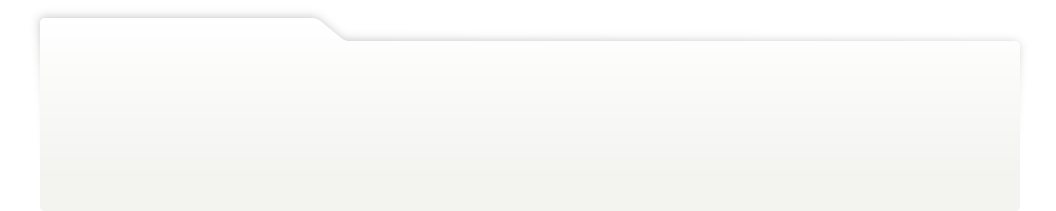
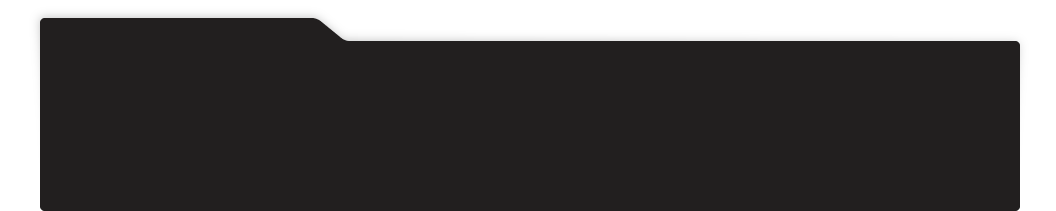
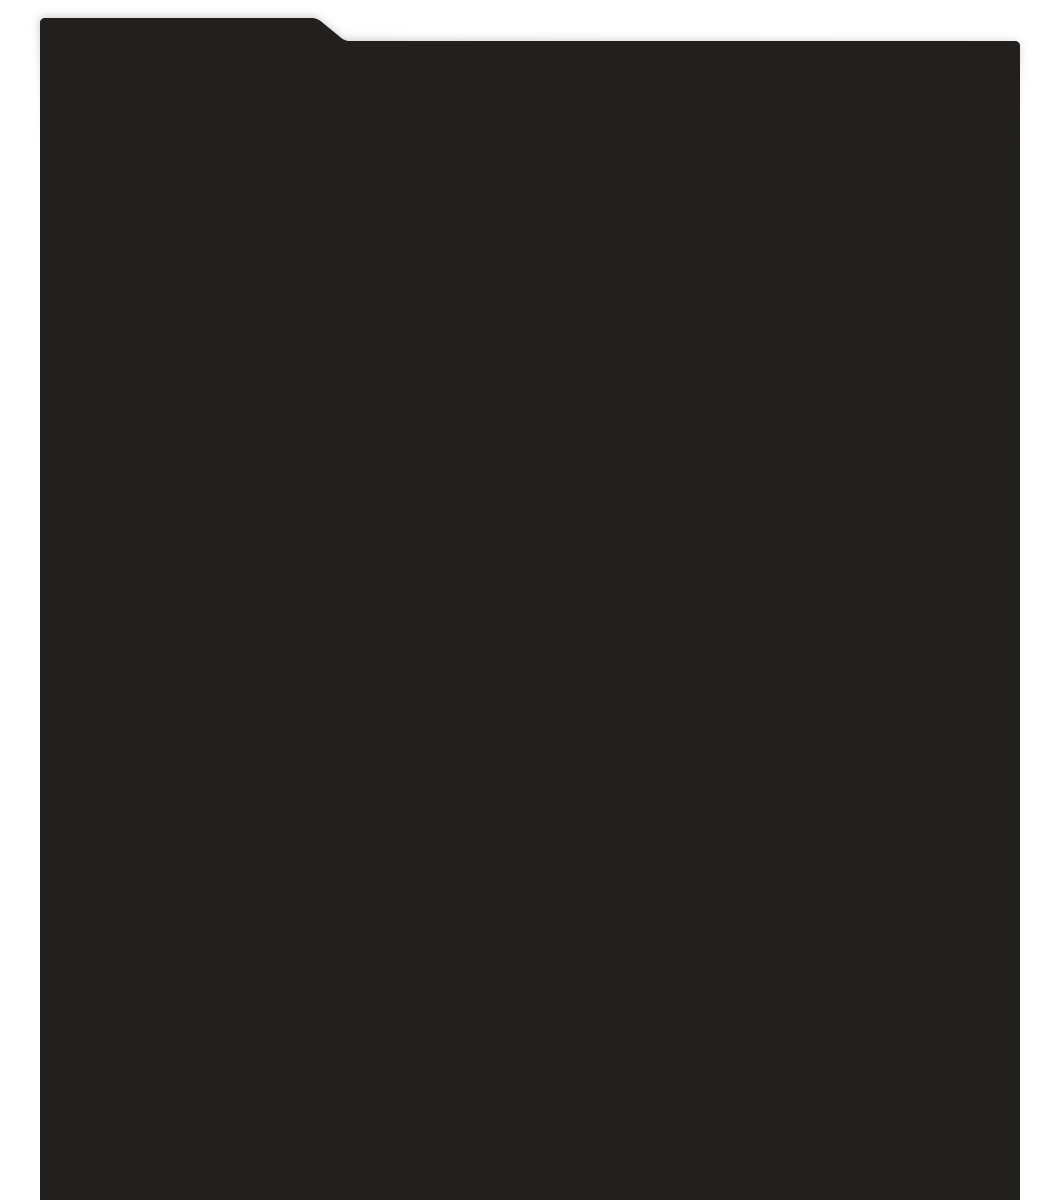
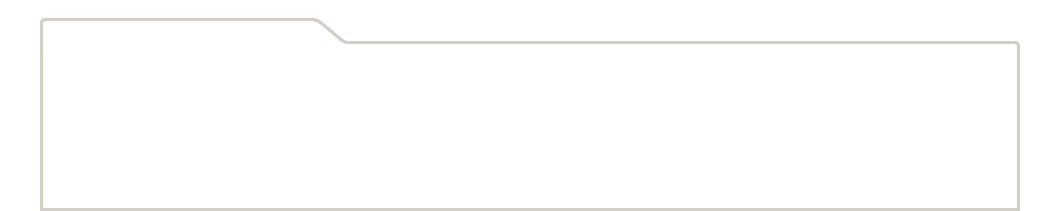
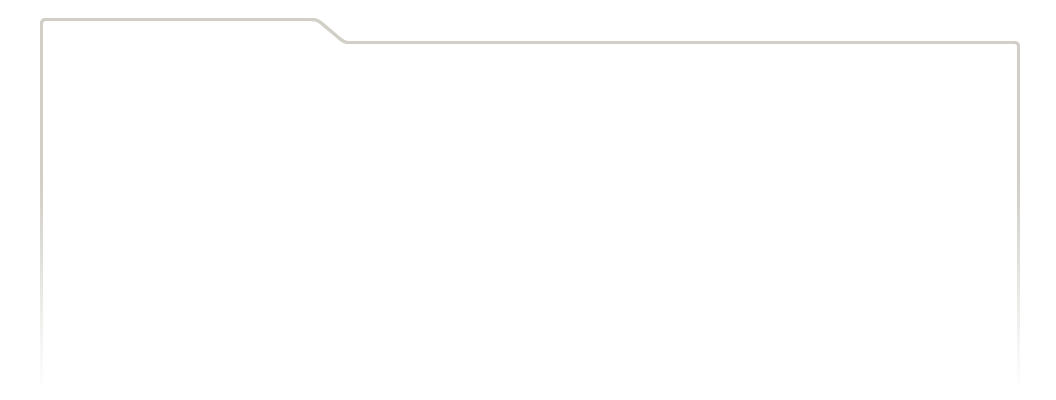
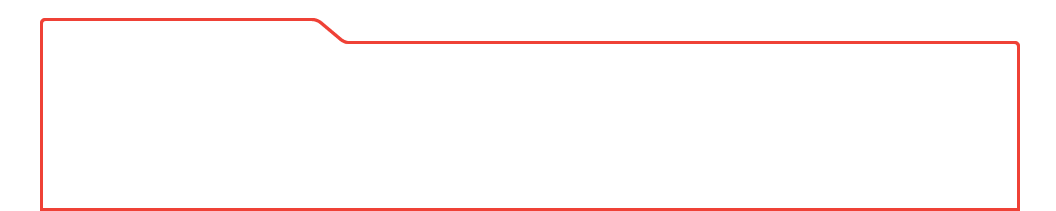
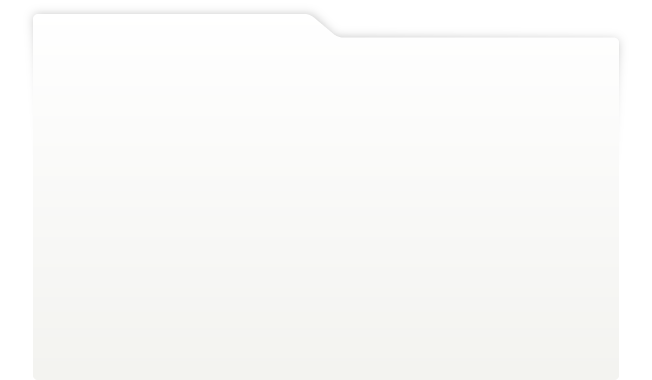
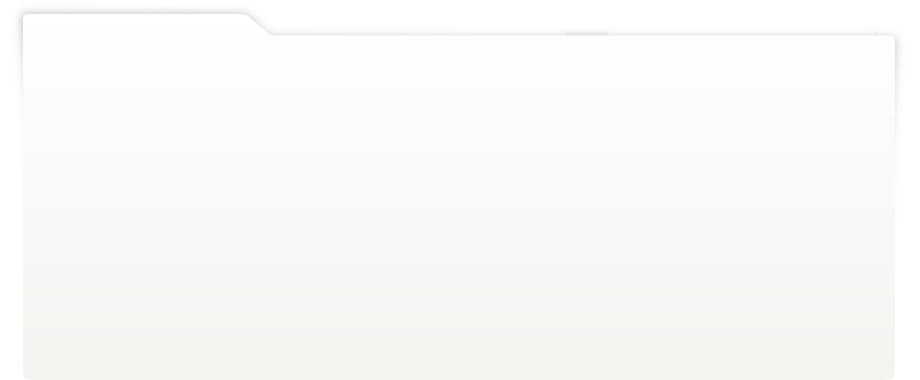
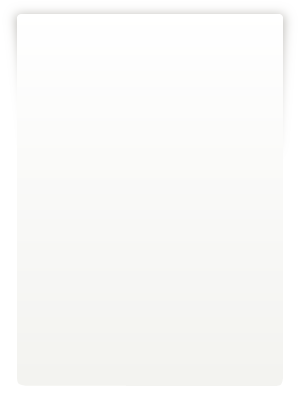
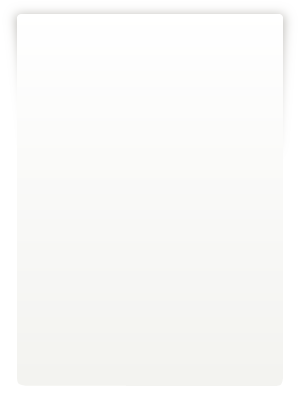
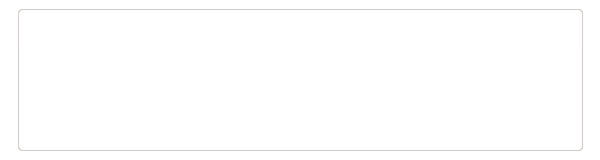
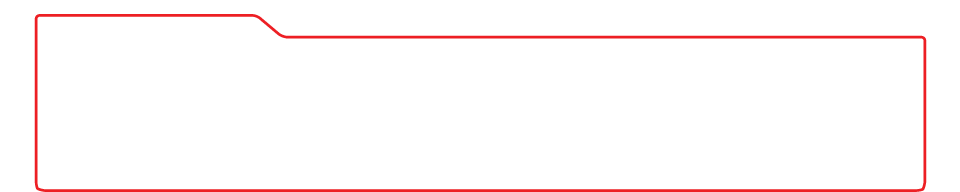
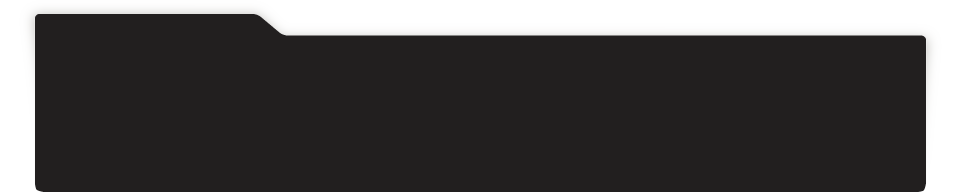
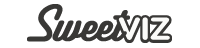
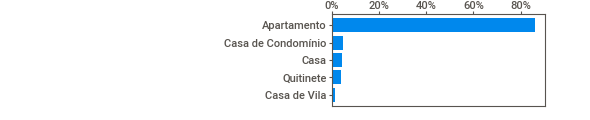
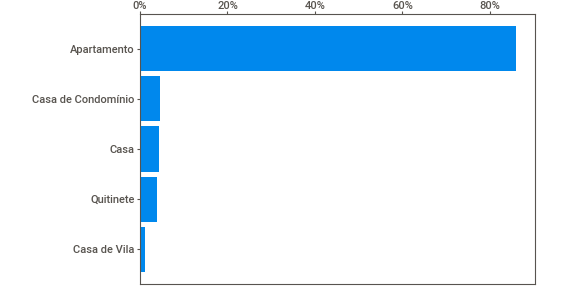
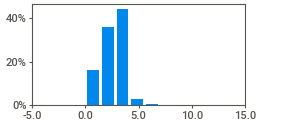
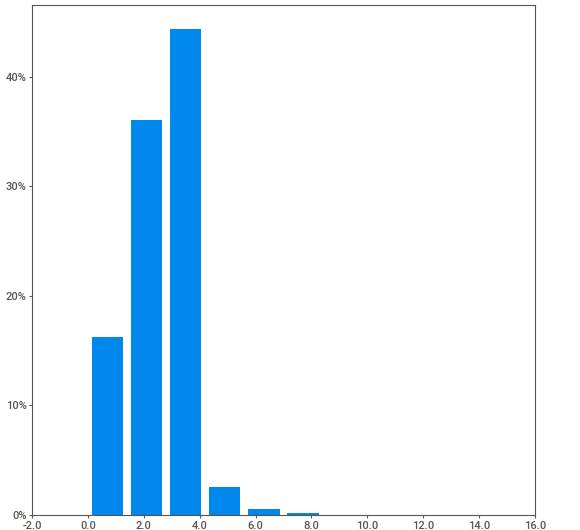
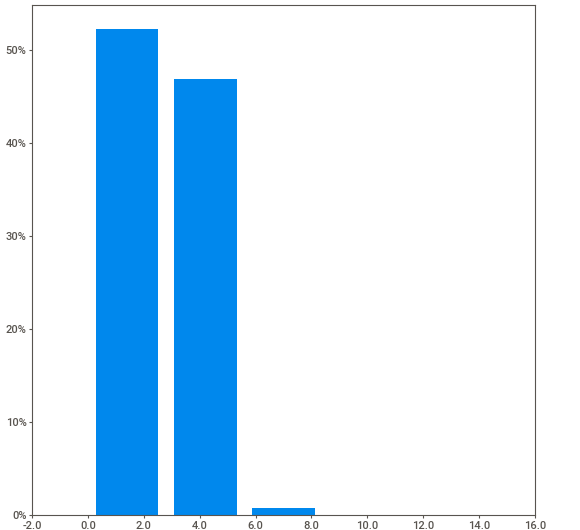
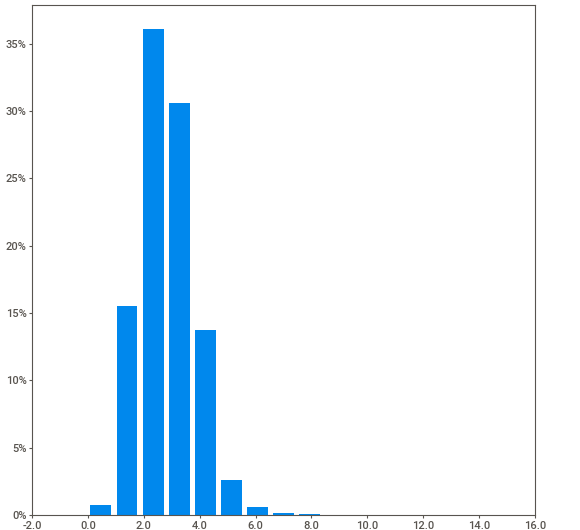
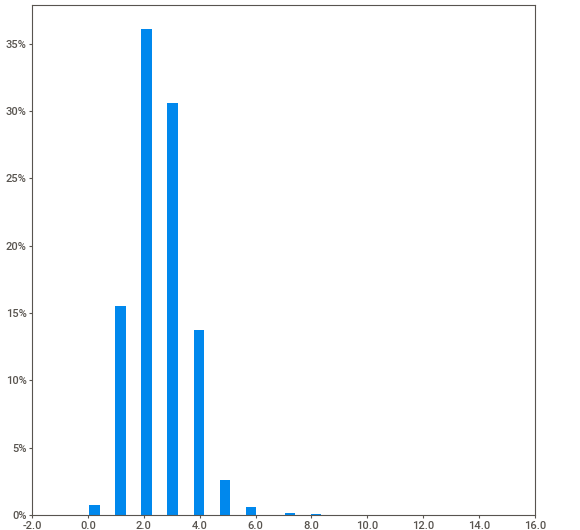
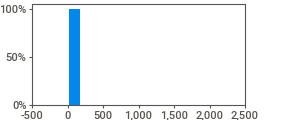
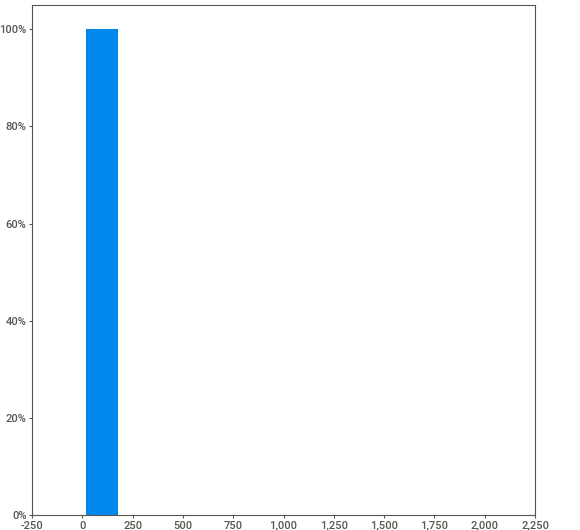
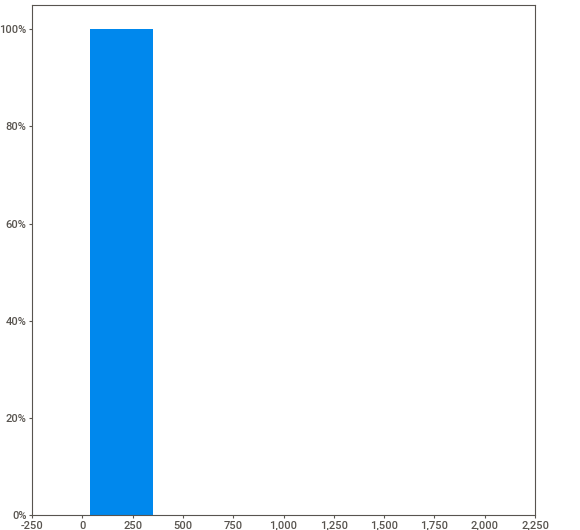
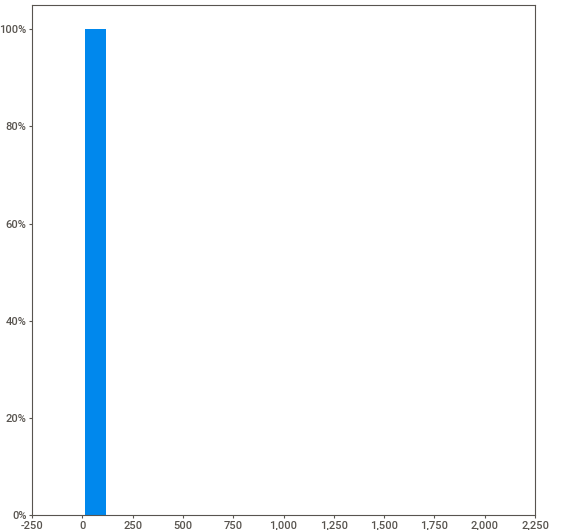
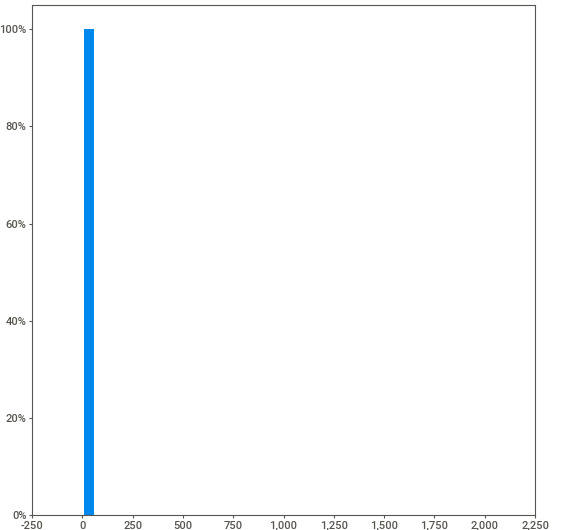
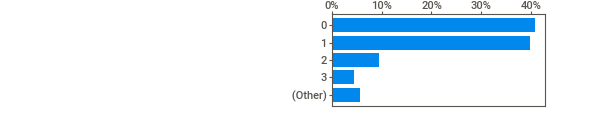
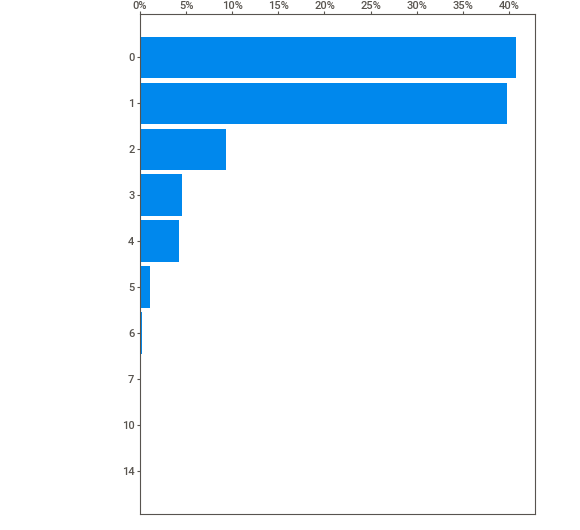
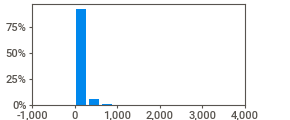
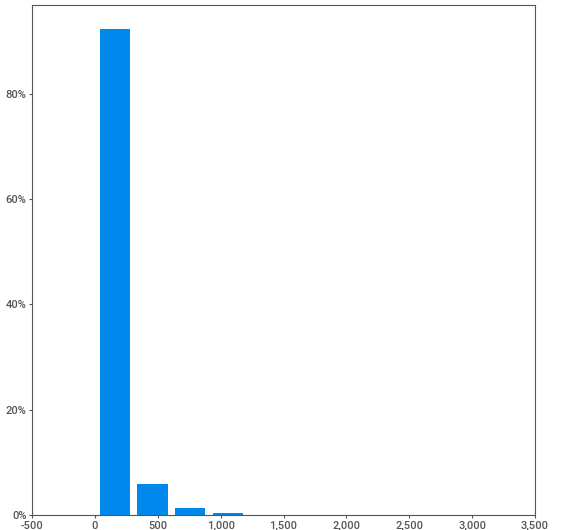
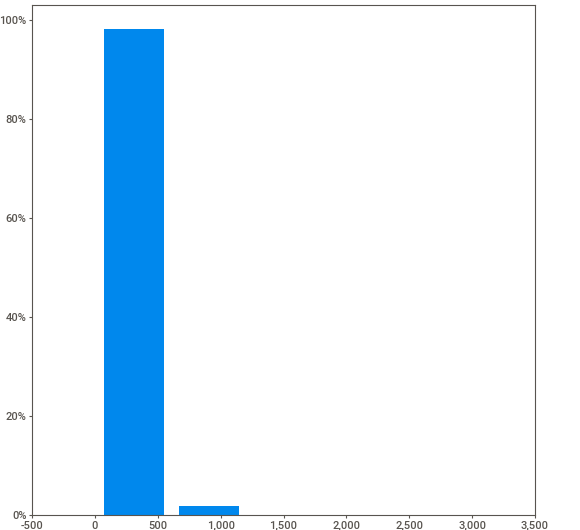
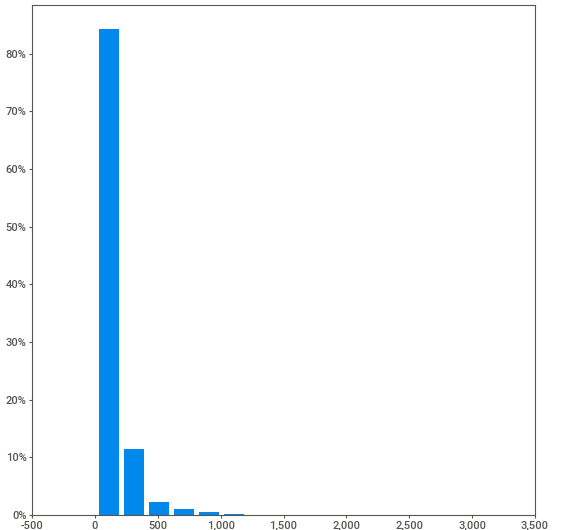
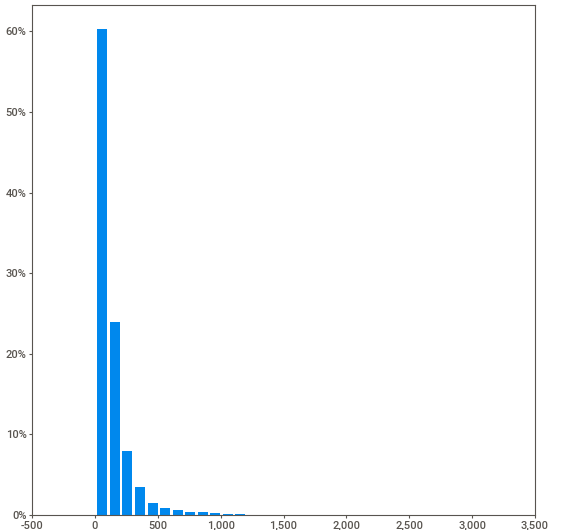
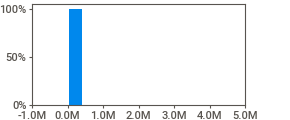
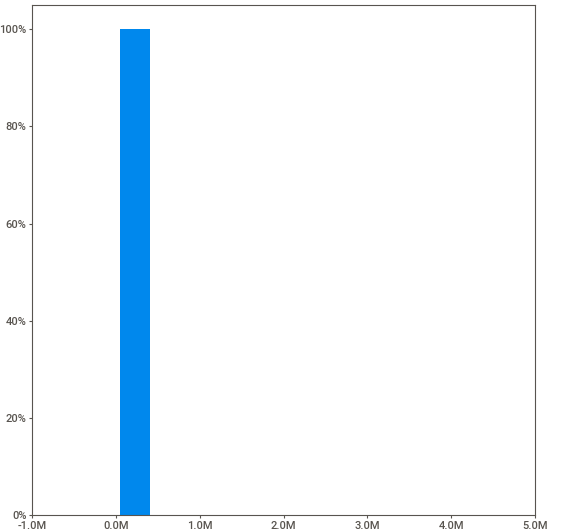
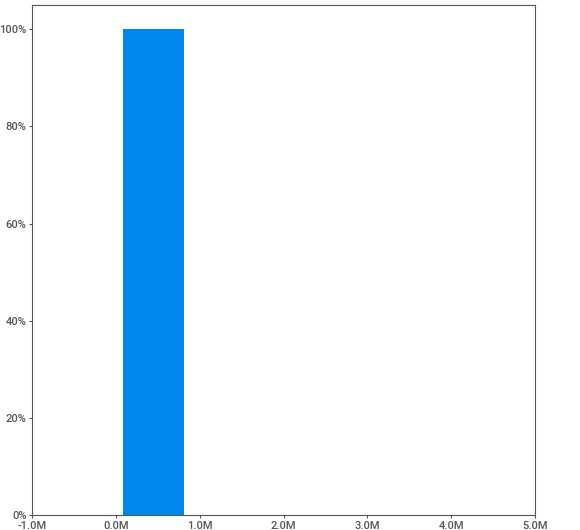
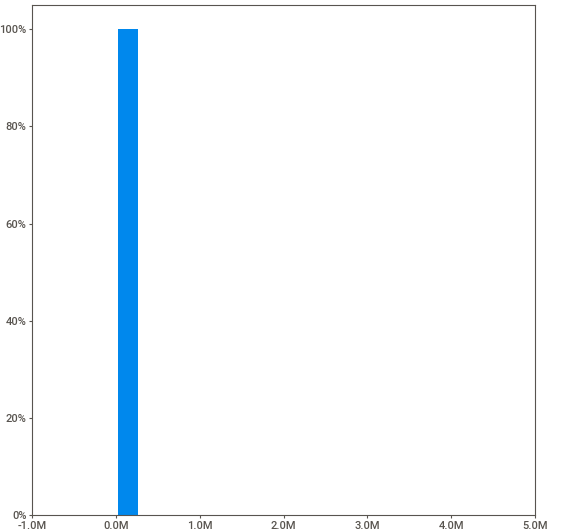
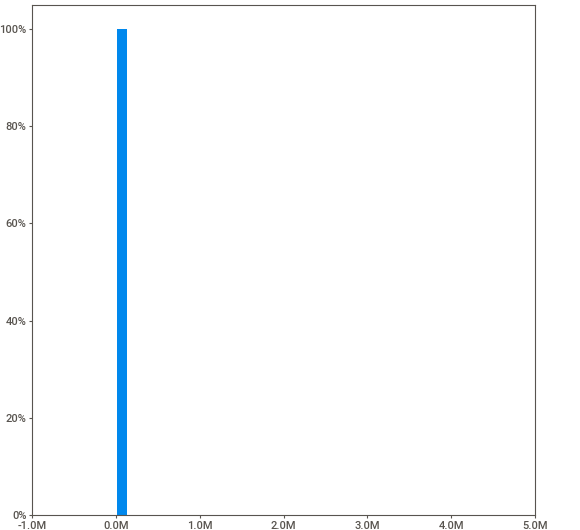
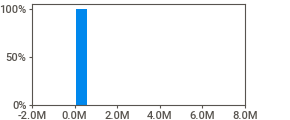
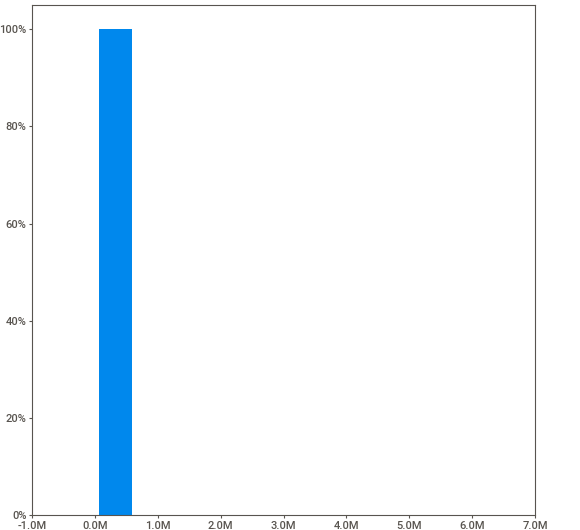
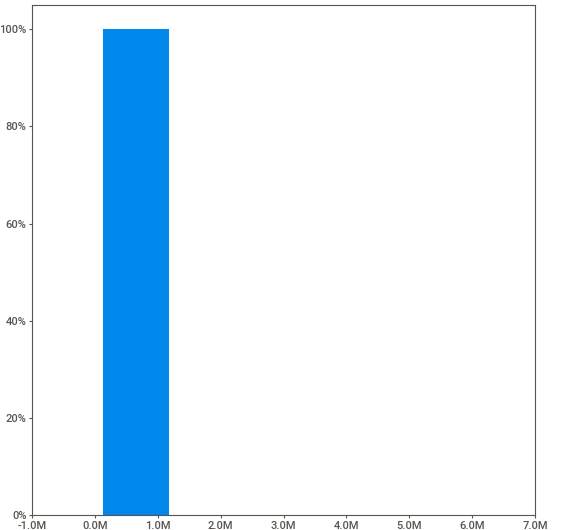
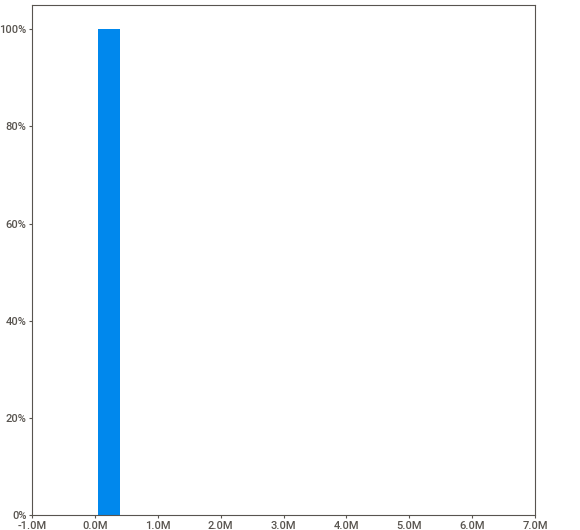
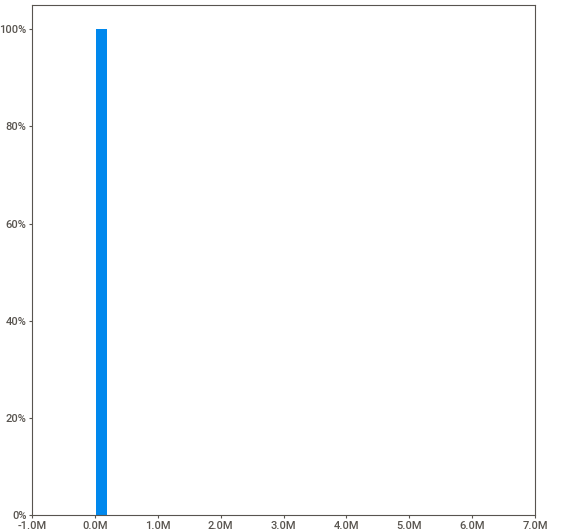
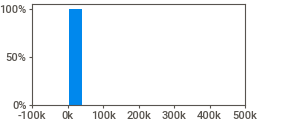
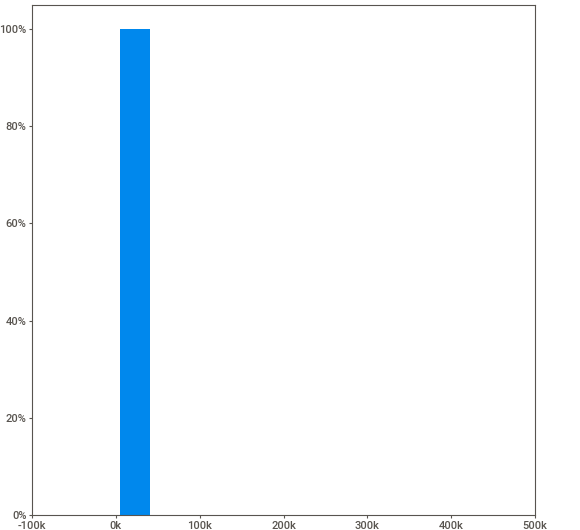
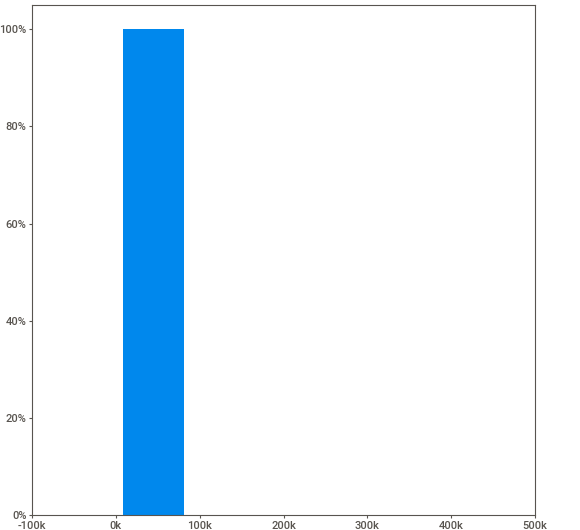
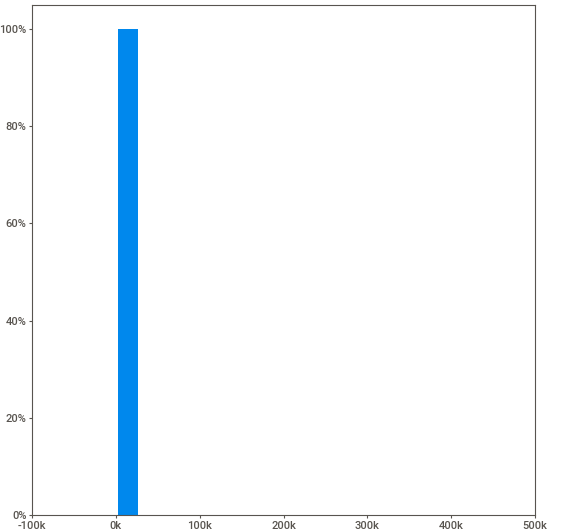
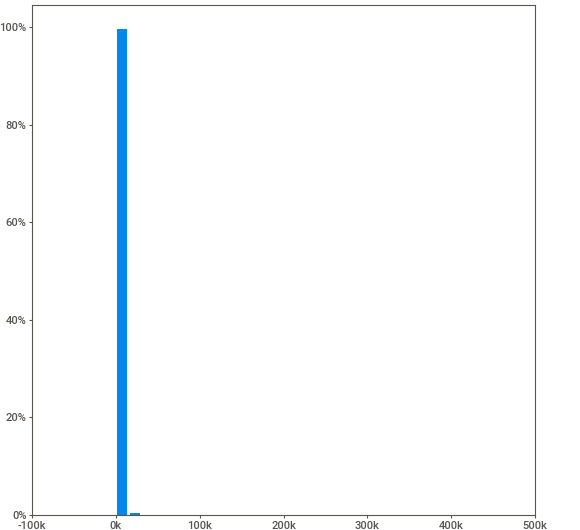
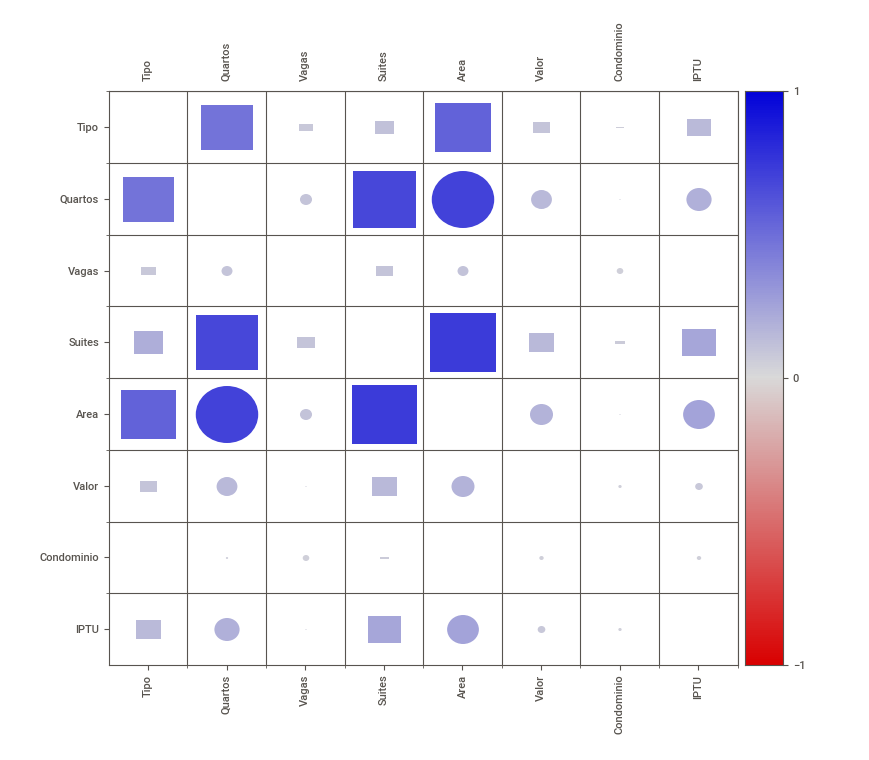
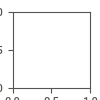

In [23]:
report = sv.analyze(df)
report.show_notebook()

Podemos ver que sumiram os dados faltantes, porém os gráficos acima ainda estão dificéis de visualizar, vamos ver se existem outliers que causam isso

### OutLiers

- Realizar uma analise e tratativa de outliers

#### ``df.select_dtypes(include='number').columns`` 

- Serve para trazer apenas as colunas de algum tipo de dado passado por parametro

Podemos usar tanto include quanto exclude

In [24]:
num_cols = df.select_dtypes(include='number').columns

print(num_cols) # Num_cols se torna um array contendo o nome das colunas que possues dados do tipo numero

Index(['Quartos', 'Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU'], dtype='object')


#### Criação dos BoxPlots das colunas de tipo number

Os BoxPlots, são gráficos que mostram as distribuições dos valores, mostrando onde os valores se enquadram, e também mostrando outliers, que são valores que estão fora do padrão dos dados

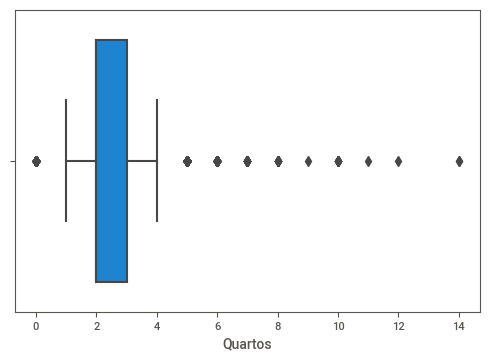

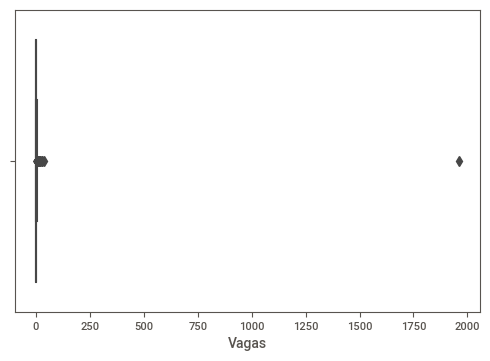

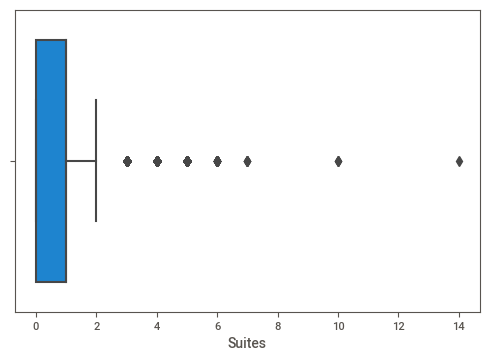

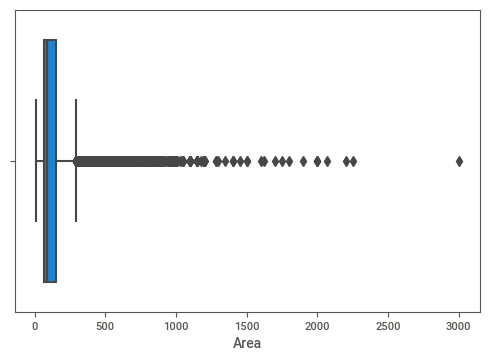

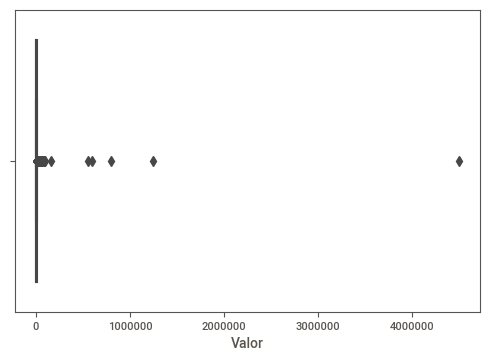

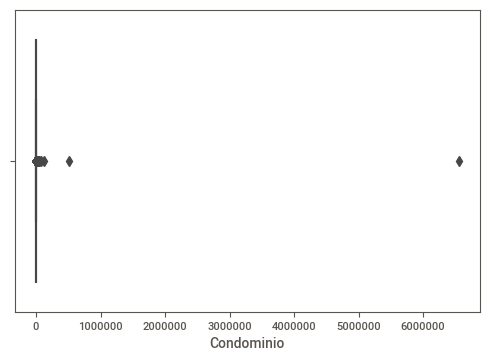

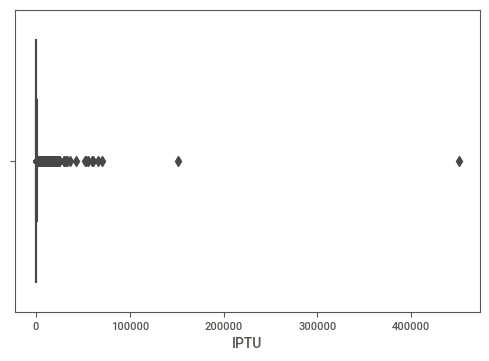

In [25]:
for col in num_cols: #num_cols foi criado na celula acima
    plt.figure();
    sns.boxplot(data=df, x=col); 
    plt.show()

Com base na visualização destes boxplots, podemos ver que existem valores que não se enquadram nos dados como por exemplo:
> - tem iptu de 400.000??
> - Condominio de 6.000.000?

Com base nisso temos que remover estes dados que comprometem nosso dataframe

#### Remover os OutLiers

Antes de remover vamos visualizar novamente o boxplot para termos uma ideia da diferença

<AxesSubplot:>

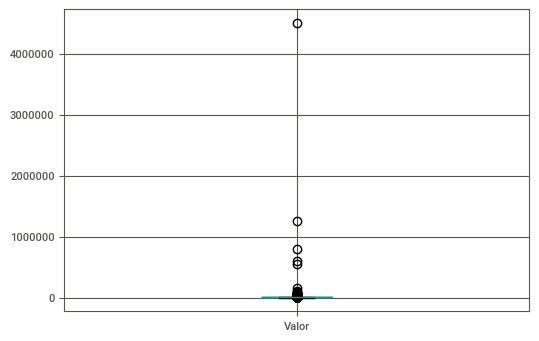

In [26]:
df.boxplot(['Valor'])

##### Removendo outliers

Formula para remoção dos outliers

<img src='Pandas/Panda básico/Curso Pandas/Box-Plot.png' width=50%>

 Esta é a formula entender os valores dos boxplot
 
 Vamos criar uma função para nao termos de ficar refazendo os passos para cada coluna que desejarmos

In [27]:
def remove_outliers(df,coluna):
    entidade = df[coluna]
    #Criação dos quartis
    q1 = entidade.quantile(.25)
    q3 = entidade.quantile(.75)
    iiq = q3 - q1
    limite_inferior = q1 - 1.5 * iiq
    limite_superior = q3 + 1.5 * iiq
    selecao = (entidade >= limite_inferior) & (entidade <= limite_superior)
    return df[selecao]

Vamos remover os outliers do **Valor**

In [28]:
df = remove_outliers(df,'Valor')
df = remove_outliers(df,'Condominio')
df = remove_outliers(df,'Vagas')
df = df[(df['IPTU'] < 50000)]

Vamos visualizar os boxplots

Index(['Quartos', 'Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU'], dtype='object')


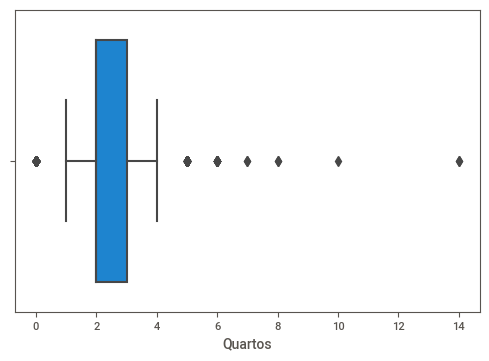

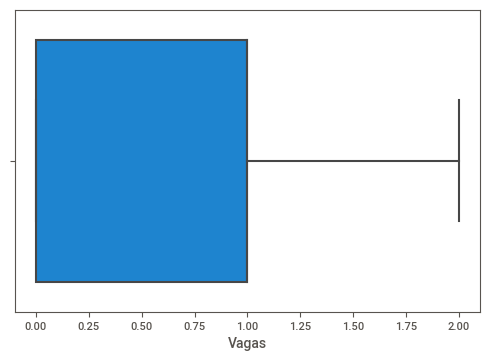

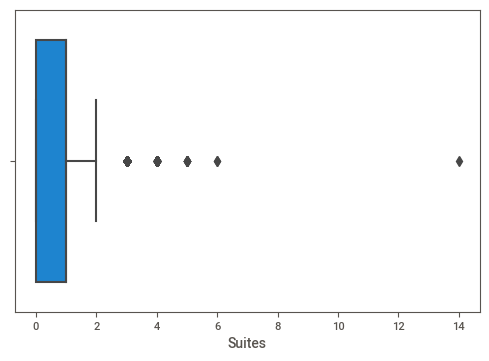

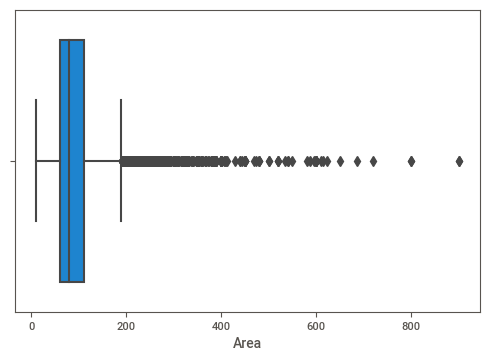

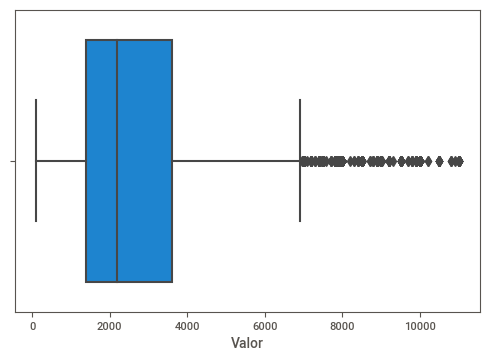

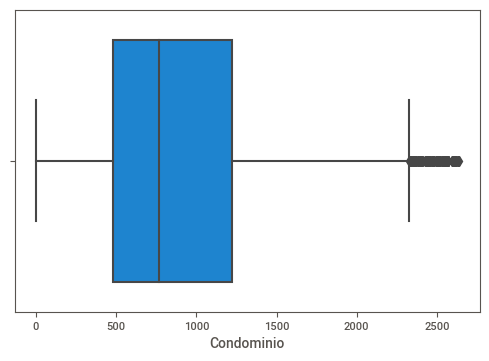

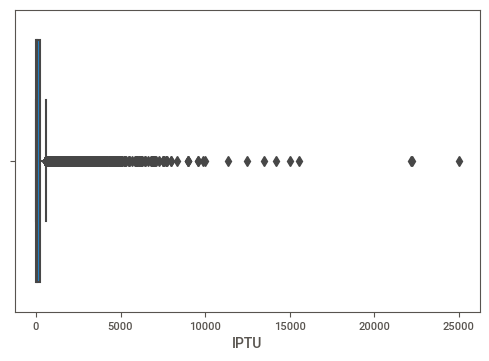

In [29]:
num_cols = df.select_dtypes(include='number').columns
print(num_cols) # Num_cols se torna um array contendo o nome das colunas que possues dados do tipo numero
for col in num_cols: #num_cols foi criado na celula acima
    plt.figure();
    sns.boxplot(data=df, x=col); 
    plt.show()

#### Vamos novamente visualizar apos todas as alterações

                                             |                                             | [  0%]   00:00 ->…


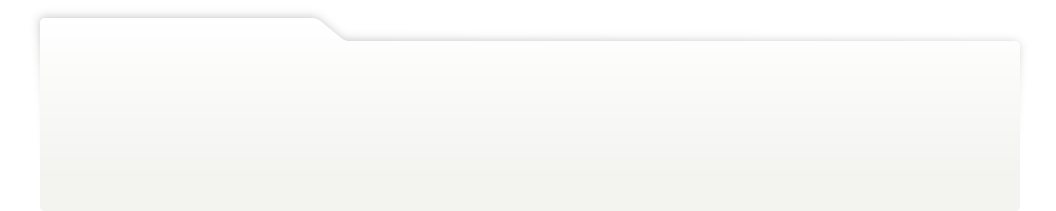
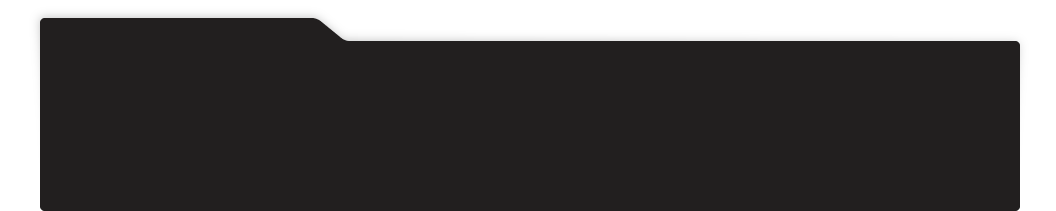
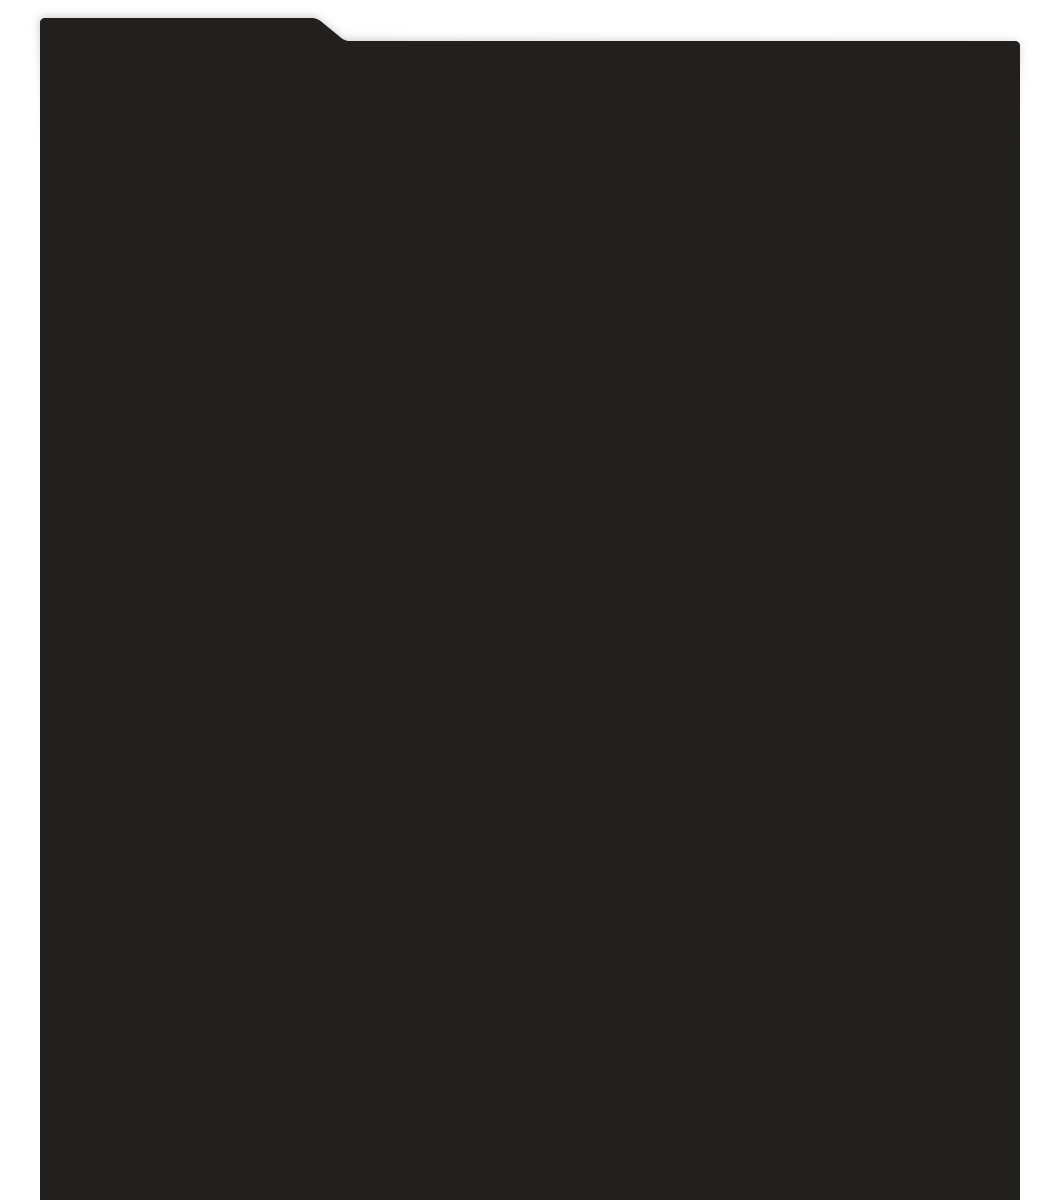
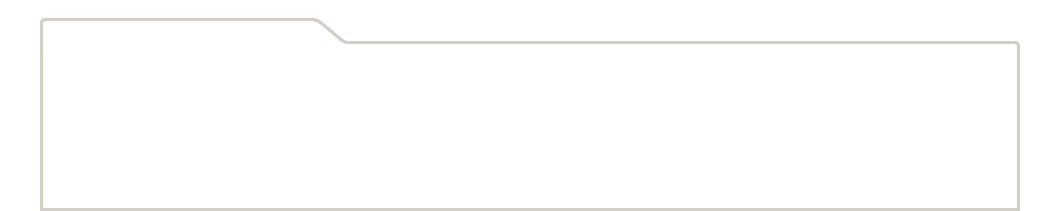
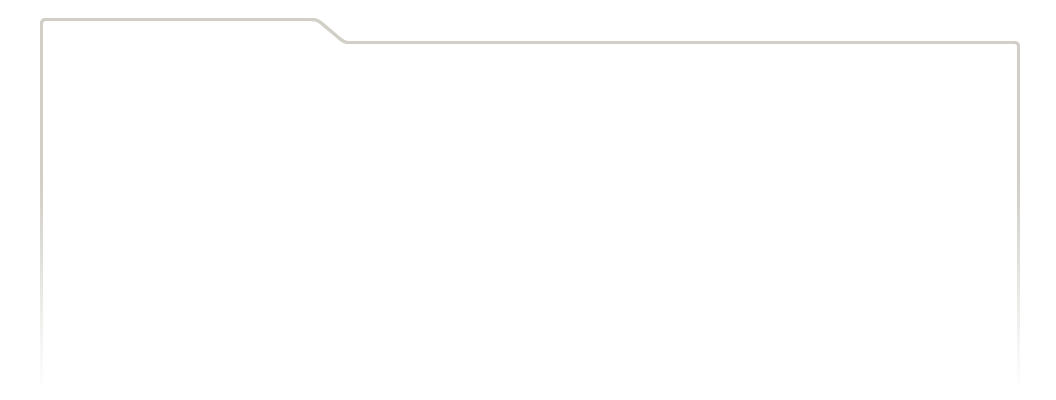
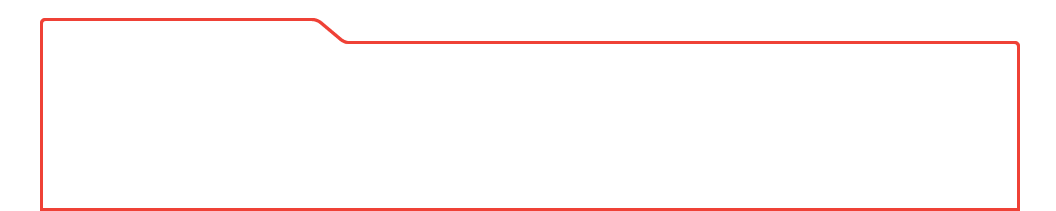
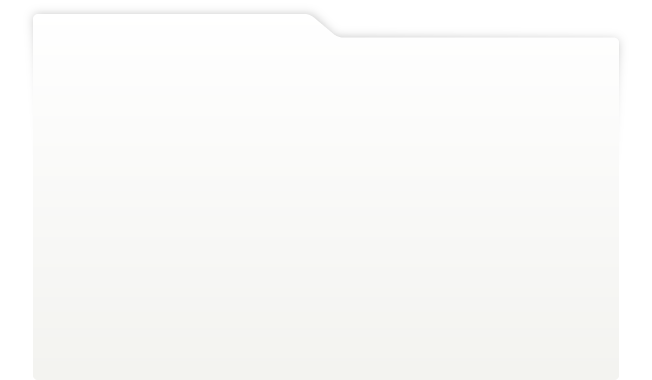
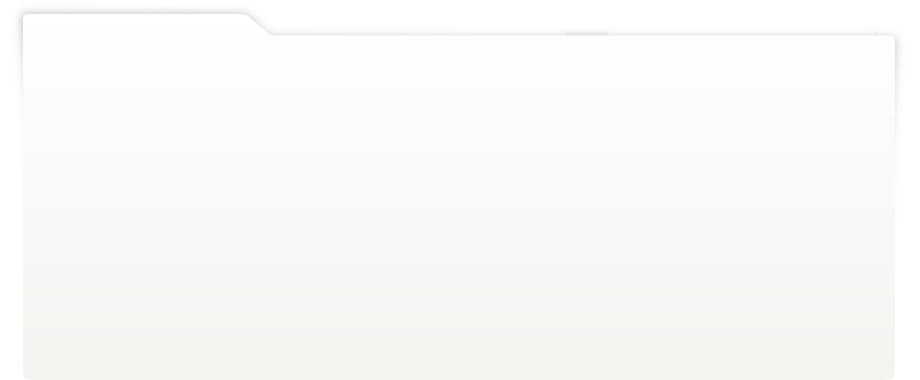
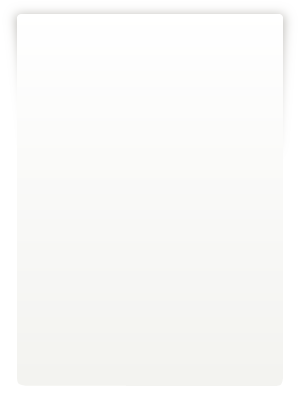
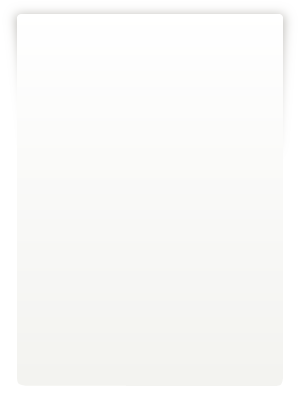
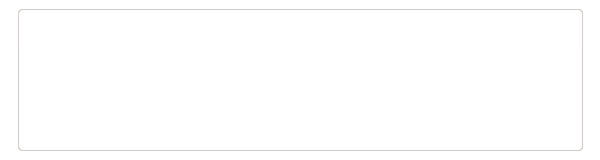
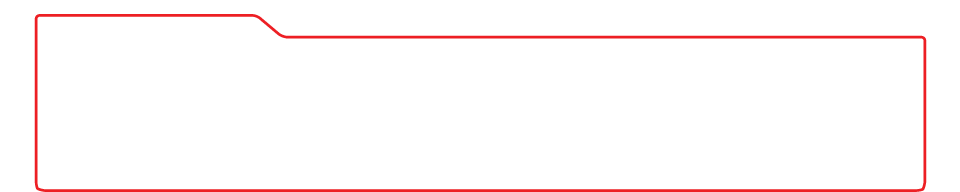
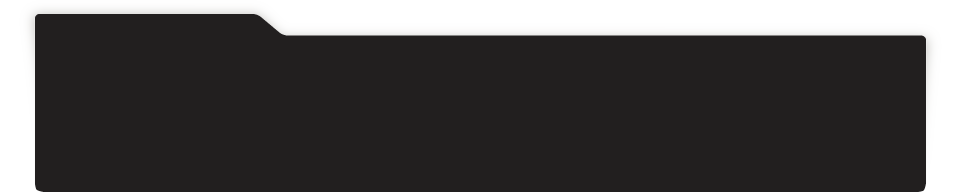
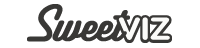
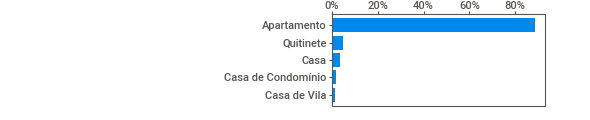
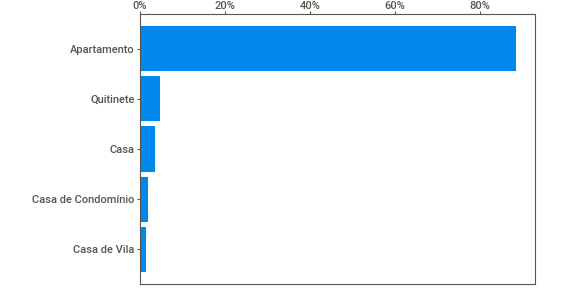
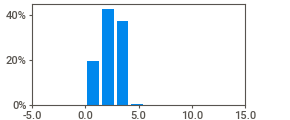
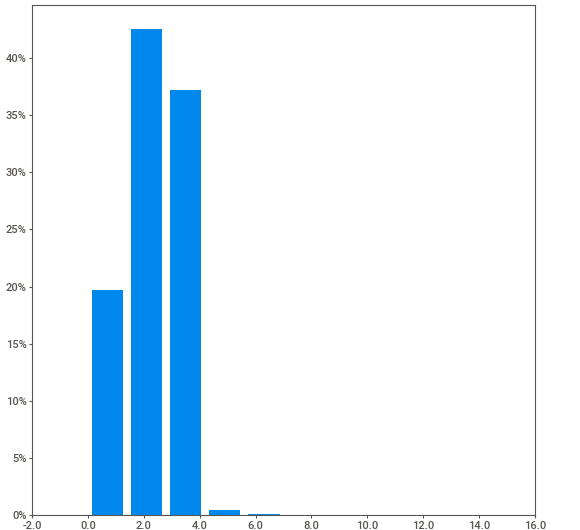
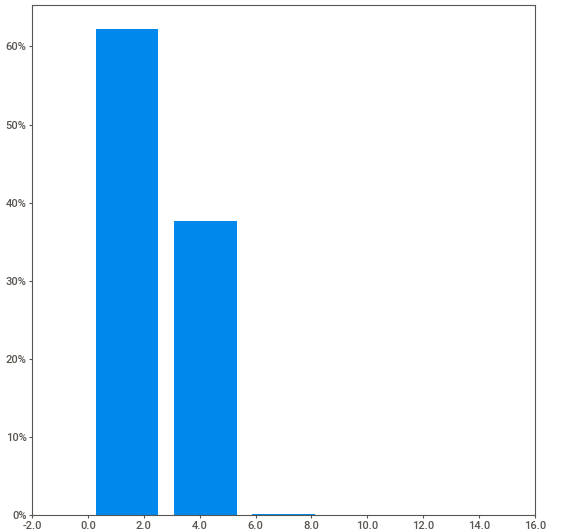
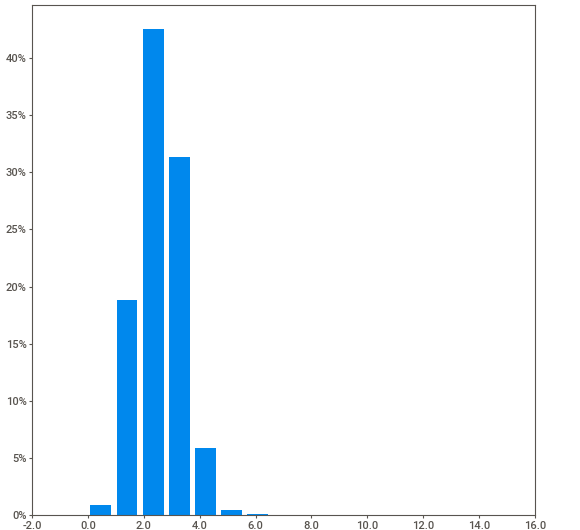
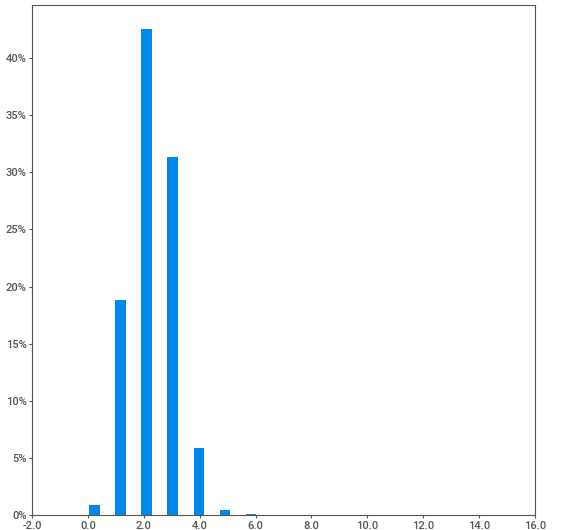
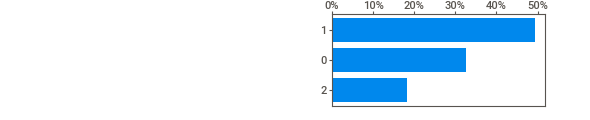
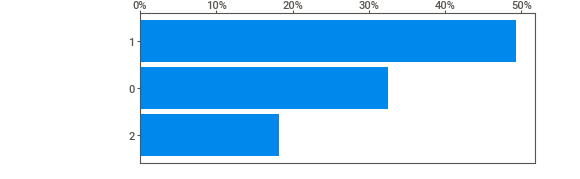
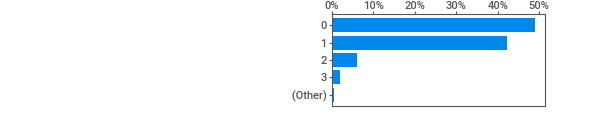
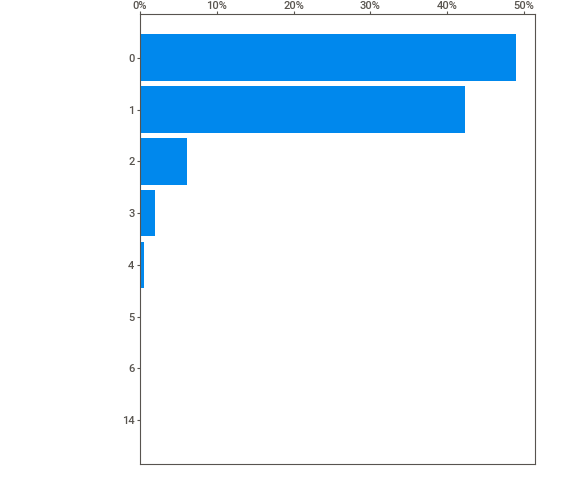
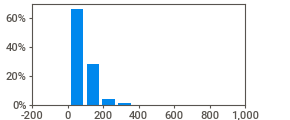
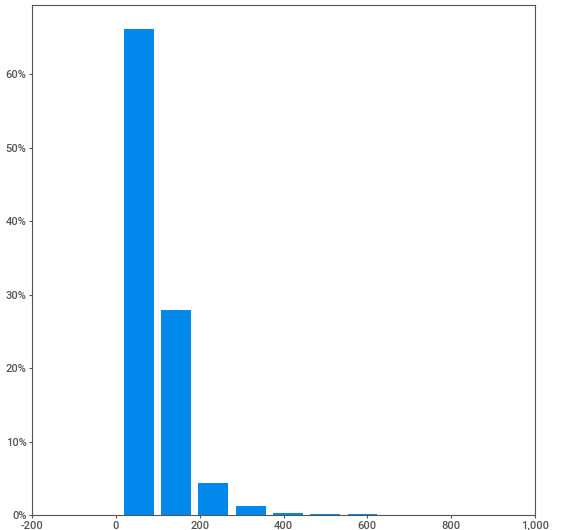
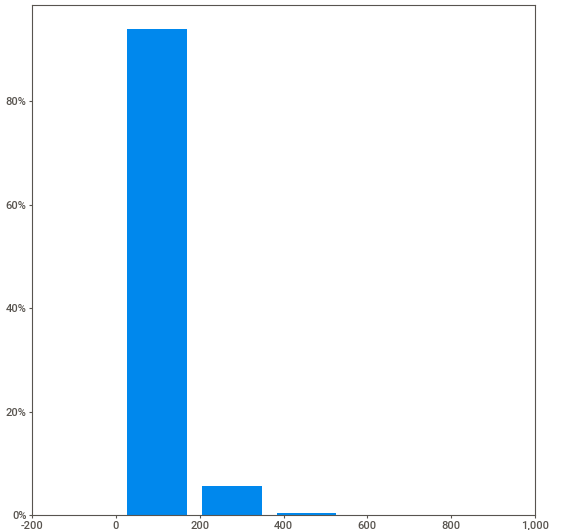
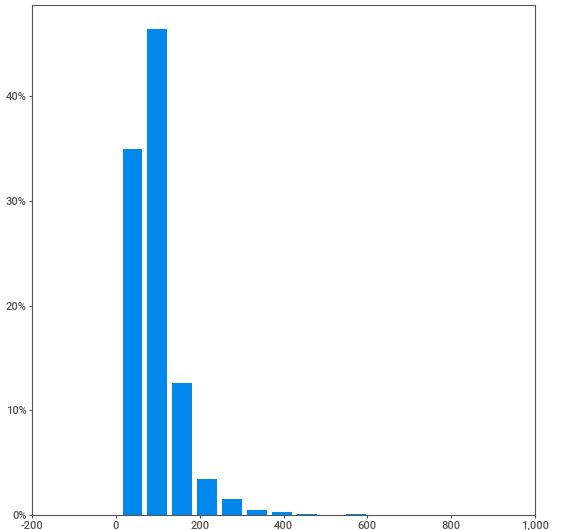
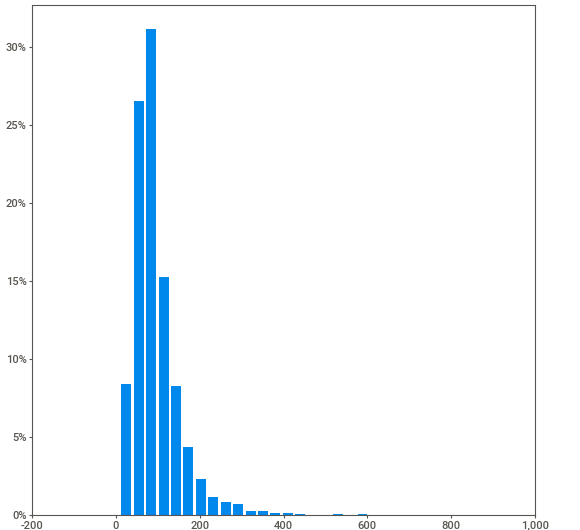
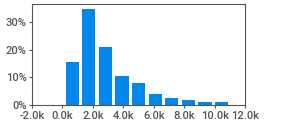
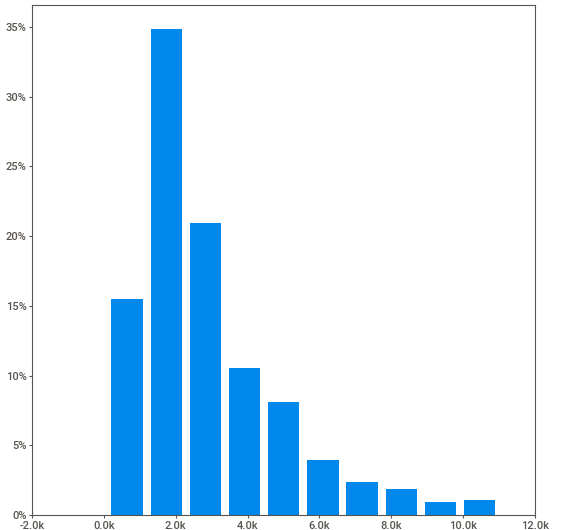
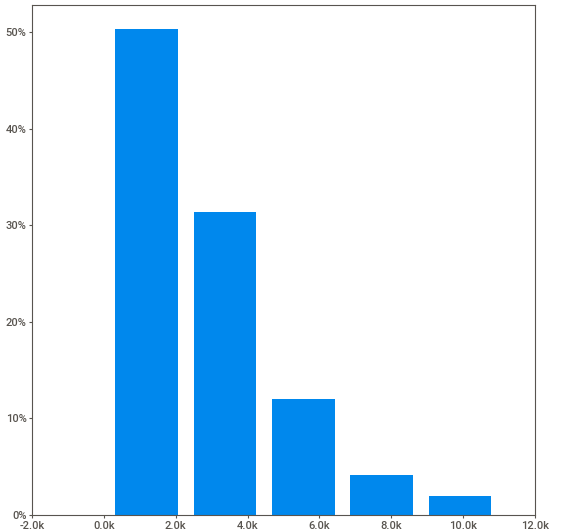
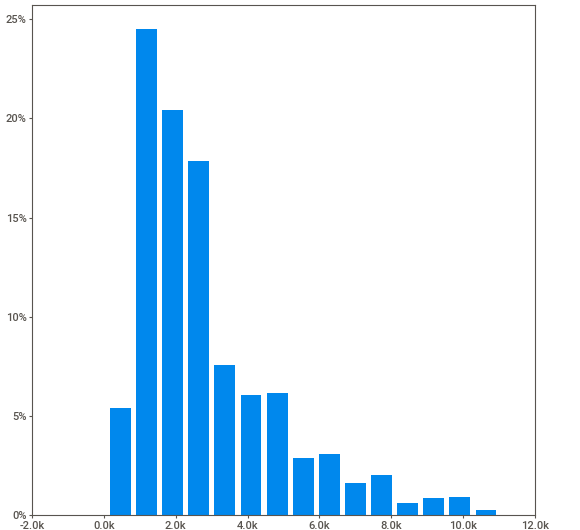
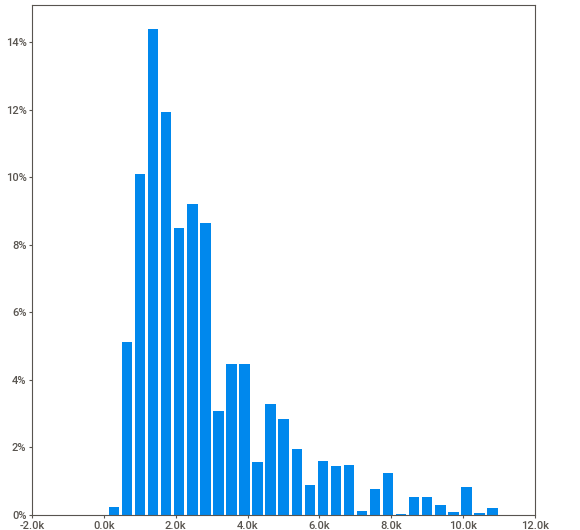
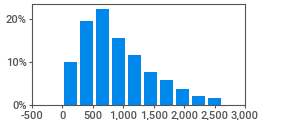
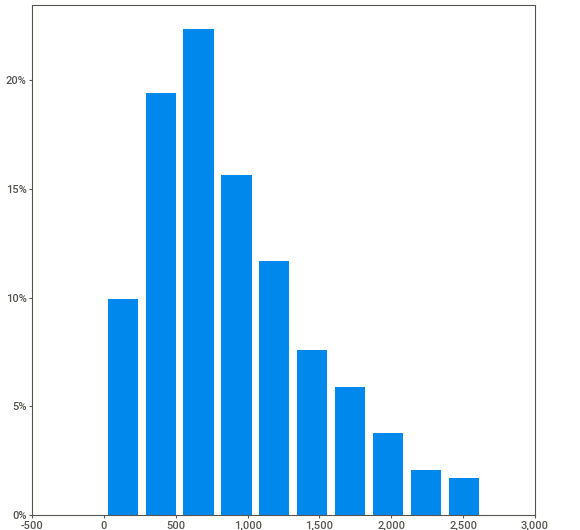
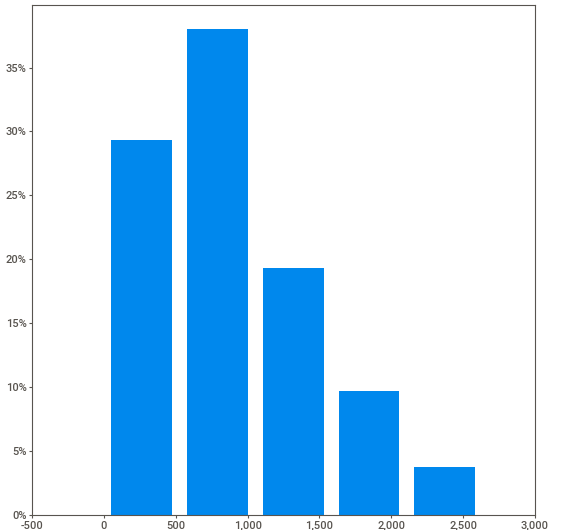
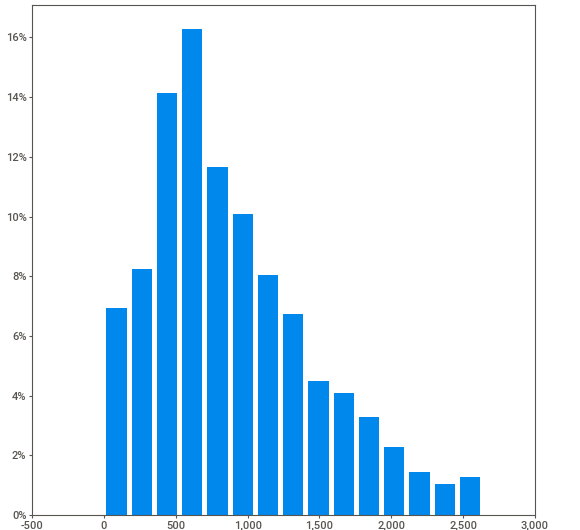
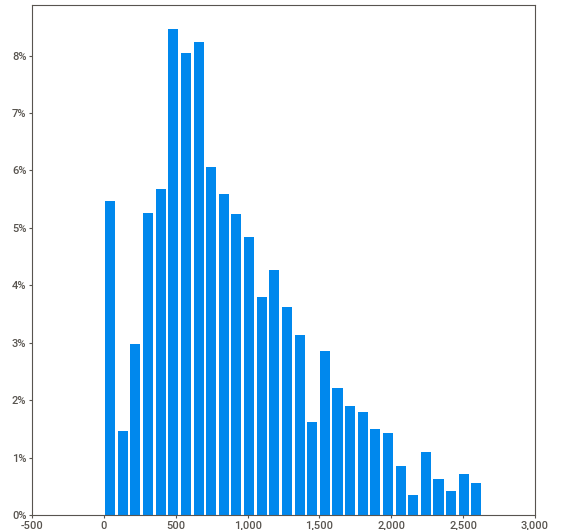
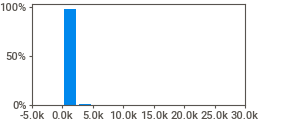
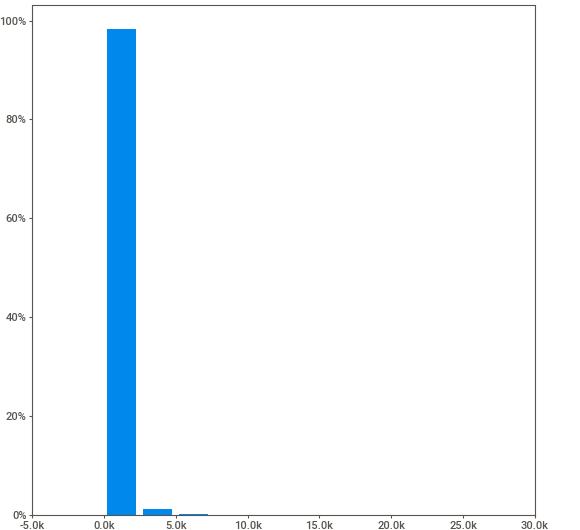
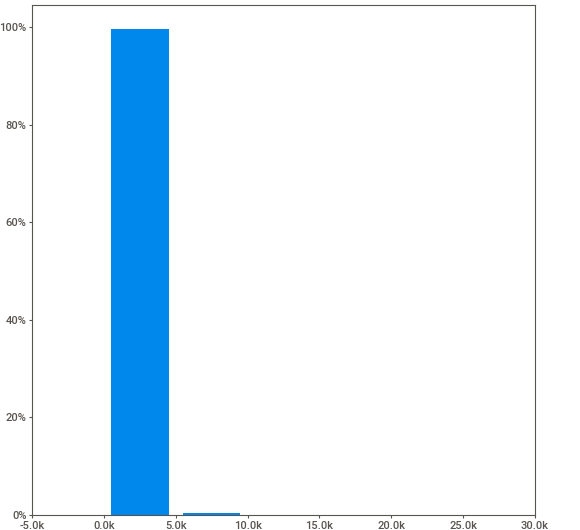
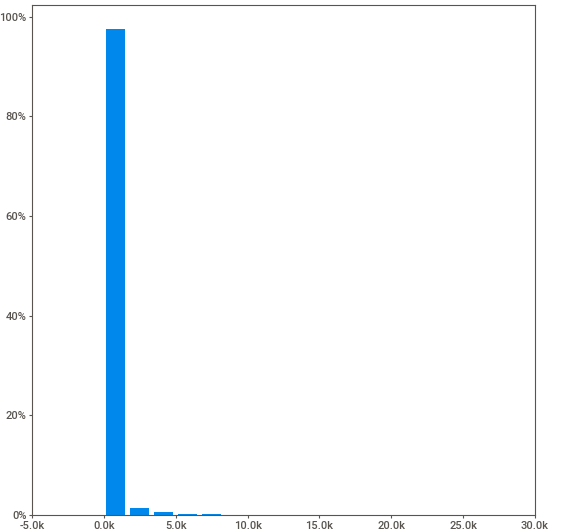
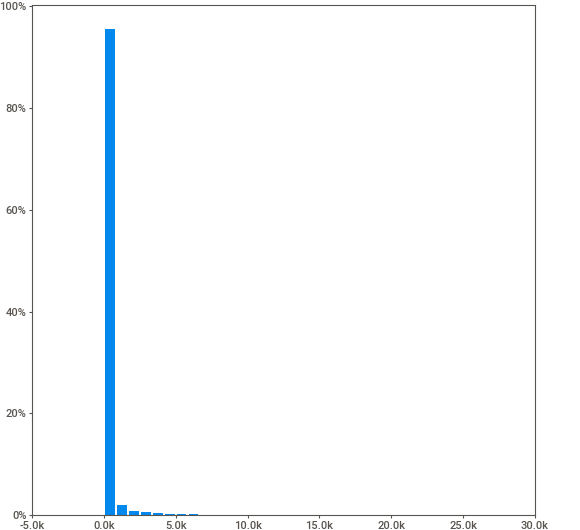
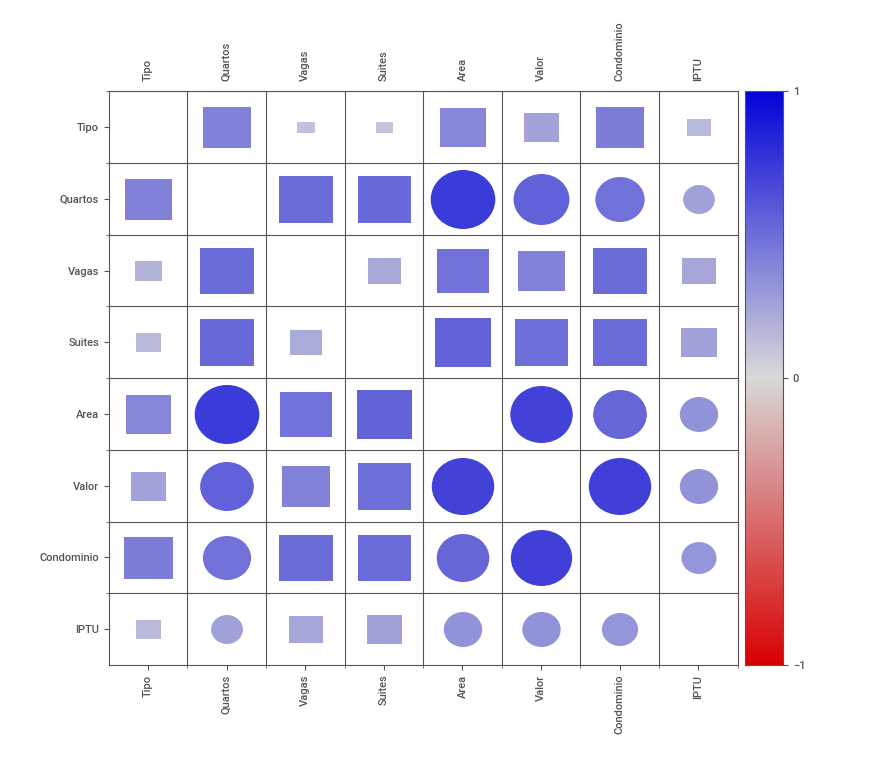
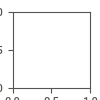

In [30]:
report = sv.analyze(df)
report.show_notebook()

Podemos ver que agora nossos dados estão muito melhores após a limpeza, não há outliers que invalidem os dados, e os gráficos estão mais entendiveis agora


### Criação dos gráficos

Em breve.....